# Preparation

In [26]:
import pandas as pd
# loading excel data into dataframe variable
data = pd.read_excel("../0_dataset_master/Experiment_edited_V6.xlsx")
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Fatigue Plot

In [27]:
def create_plot(data_master, y, x_col, colors, labels, col_x_labels):
    '''
    data_master: will be the data
    y: the unique value of x_col
    x_col: choose the column that want to be plotted
    colors: the length of colors must be the same within y
    labels: the meaning of y value
    col_x_labels: sb x title
    '''

    # Prepare the data
    x = ['AC', 'NV fan 5', 'NV fan 3', 'NV fan 0']
    x_labels = ['AC\nc-fan 0%', 'NV\nc-fan 60%', 'NV\nc-fan 40%', 'NV\nc-fan 0%']
    tnl = [45,55,70]
    data_y = {}

    for tf in tnl:
        data_y[tf] = {}
        for item in y:
            for group in x:
                data_slice = data_master[(data_master[x_col]==item) & (data_master['Traffic noise levels']==tf) & (data_master['Thermal'] == group)].copy()
                res = len(data_slice)

                if data_y[tf].get(item, None):
                    data_y[tf][item].append(res)
                else:
                    data_y[tf][item] = []
                    data_y[tf][item].append(res)
            data_y[tf][item] = np.array(data_y[tf][item])

    # memo of sample number
    for tf in tnl:
        snum = data_y[tf][4]
        for item in y:
            snum = snum + data_y[tf][item]
        snum = snum - data_y[tf][4]
        for item in y:
            data_y[tf][item] = data_y[tf][item]/snum*100

    # stack bars
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True,  gridspec_kw={'width_ratios': [1, 4, 4]})
    fig.supxlabel(col_x_labels, fontsize=12)
    fig.set_figwidth(12)
    fig.set_figheight(10)
    ax1.set_title('Traffic Noise Level\n45 dBA', fontsize=10, y=1)
    ax2.set_title('Traffic Noise Level\n55 dBA', fontsize=10, y=1)
    ax3.set_title('Traffic Noise Level\n70 dBA', fontsize=10, y=1)
    plt.ylim(0,100)
    plt.subplots_adjust(wspace=0)
    plt.yticks(ticks = [10,20,30,40,50,60,70,80,90,100], labels=['10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'])
    bar_width = 0.75

    # loop for tnl 55
    for index, item in enumerate(y):
        # data_y[55][list(data_y[55].keys())[index]]
        if index == 0:
            ax2.bar(x_labels, data_y[55][item], label=labels[index], color = colors[index], width=bar_width)
            sbot = data_y[55][item]
            for xpos, ypos, yval in zip(x_labels, sbot/2, sbot):
                if yval > 0:
                    ax2.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
        else:
            ax2.bar(x_labels, data_y[55][item], bottom=sbot, label=labels[index], color = colors[index], width=bar_width)
            for xpos, ypos, yval in zip(x_labels, sbot+data_y[55][item]/2, data_y[55][item]):
                if yval > 0:
                    ax2.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
            sbot += data_y[55][item]

    # loop for tnl 70
    for index, item in enumerate(y):
        # data_y[70][list(data_y[70].keys())[index-1]]
        if index == 0:
            ax3.bar(x_labels, data_y[70][item], label=labels[index], color = colors[index], width=bar_width)
            sbot = data_y[70][item]
            for xpos, ypos, yval in zip(x_labels, sbot/2, sbot):
                if yval > 0:
                    ax3.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
        else:
            ax3.bar(x_labels, data_y[70][item], bottom=sbot, label=labels[index], color = colors[index], width=bar_width)
            for xpos, ypos, yval in zip(x_labels, sbot+data_y[70][item]/2, data_y[70][item]):
                if yval > 0:
                    ax3.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
            sbot += data_y[70][item]

    # loop for tnl 45
    for index, item in enumerate(y):
        # data_y[45][list(data_y[45].keys())[index-1]]
        if index == 0:
            ax1.bar(x_labels, data_y[45][item], label=labels[index], color = colors[index], width=bar_width)
            sbot = data_y[45][item]
            for xpos, ypos, yval in zip(x_labels, sbot/2, sbot):
                if yval > 0:
                    ax1.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
        else:
            ax1.bar(x_labels, data_y[45][item], bottom=sbot, label=labels[index], color = colors[index], width=bar_width)
            for xpos, ypos, yval in zip(x_labels, sbot+data_y[45][item]/2, data_y[45][item]):
                if yval > 0:
                    ax1.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
            sbot += data_y[45][item]

    plt.legend(bbox_to_anchor=(-1.15,1.2), loc='lower left', ncol=len(colors), borderaxespad=0.)
    plt.show()

C:\Users\ZENI\AppData\Local\Temp\ipykernel_1388\873614949.py:38: RuntimeWarning: invalid value encountered in divide
  data_y[tf][item] = data_y[tf][item]/snum*100


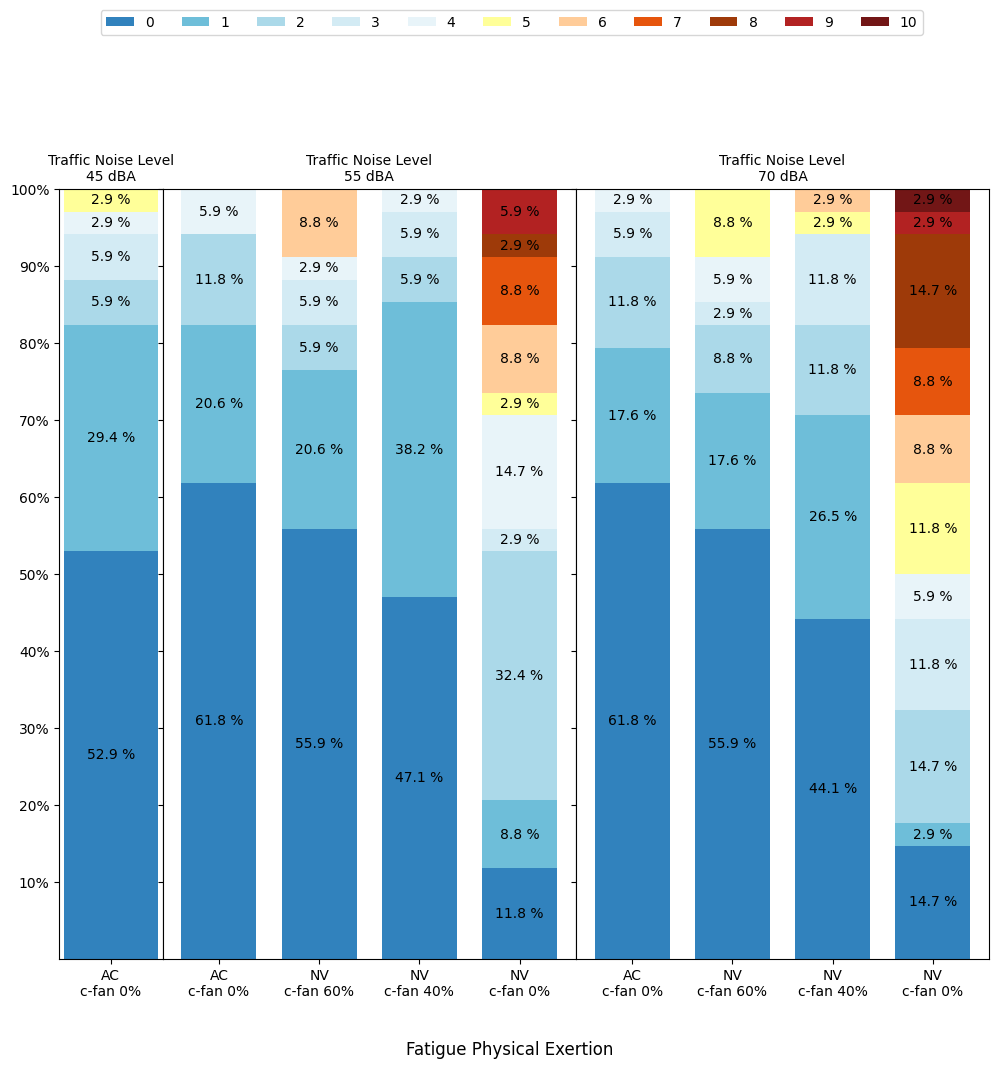

C:\Users\ZENI\AppData\Local\Temp\ipykernel_1388\873614949.py:38: RuntimeWarning: invalid value encountered in divide
  data_y[tf][item] = data_y[tf][item]/snum*100


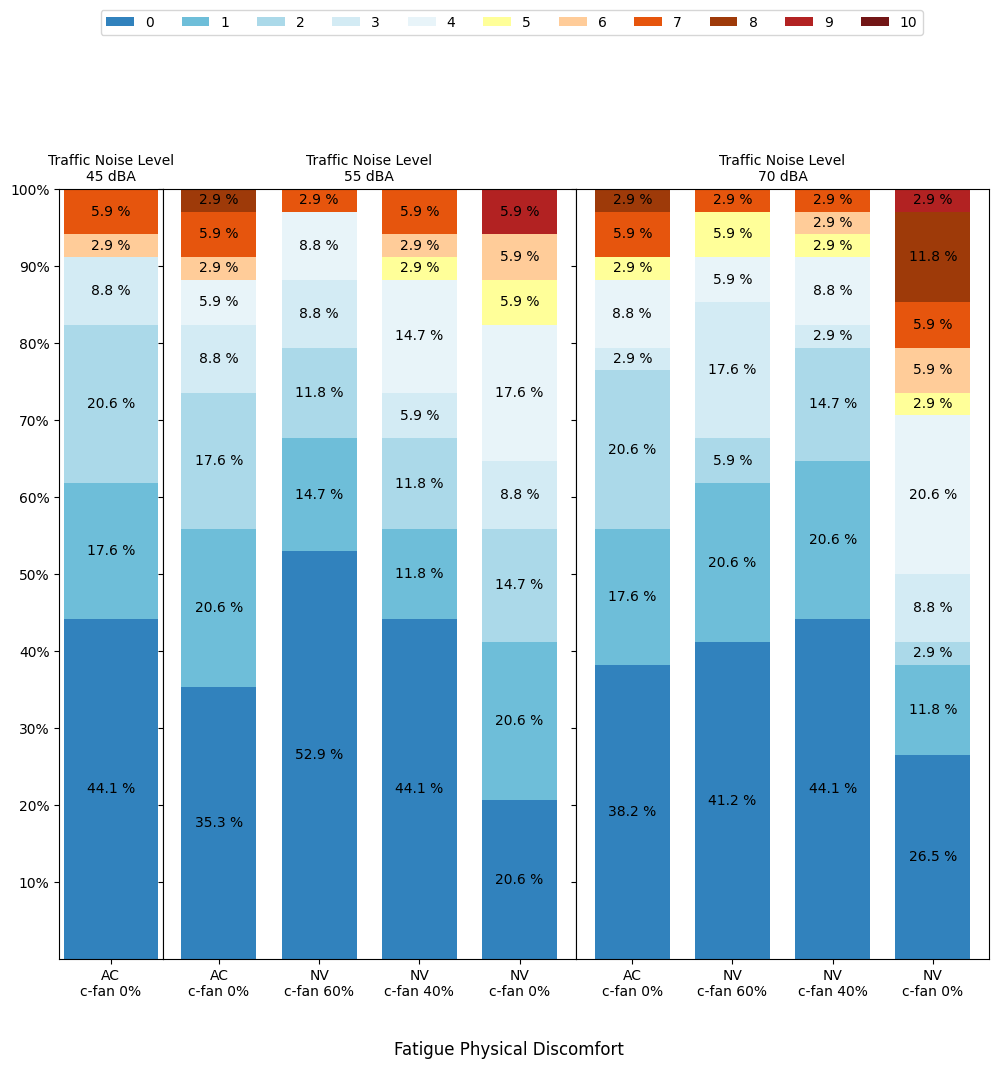

C:\Users\ZENI\AppData\Local\Temp\ipykernel_1388\873614949.py:38: RuntimeWarning: invalid value encountered in divide
  data_y[tf][item] = data_y[tf][item]/snum*100


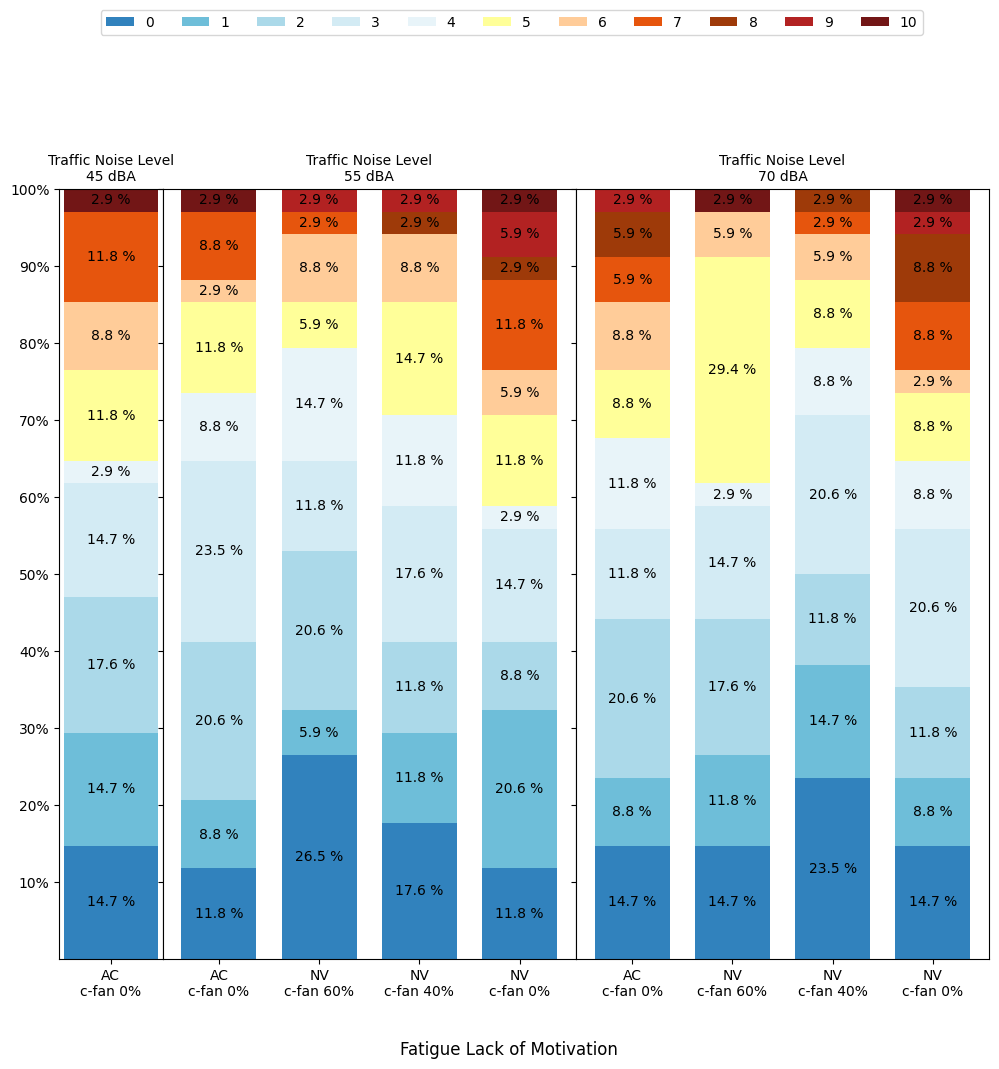

C:\Users\ZENI\AppData\Local\Temp\ipykernel_1388\873614949.py:38: RuntimeWarning: invalid value encountered in divide
  data_y[tf][item] = data_y[tf][item]/snum*100


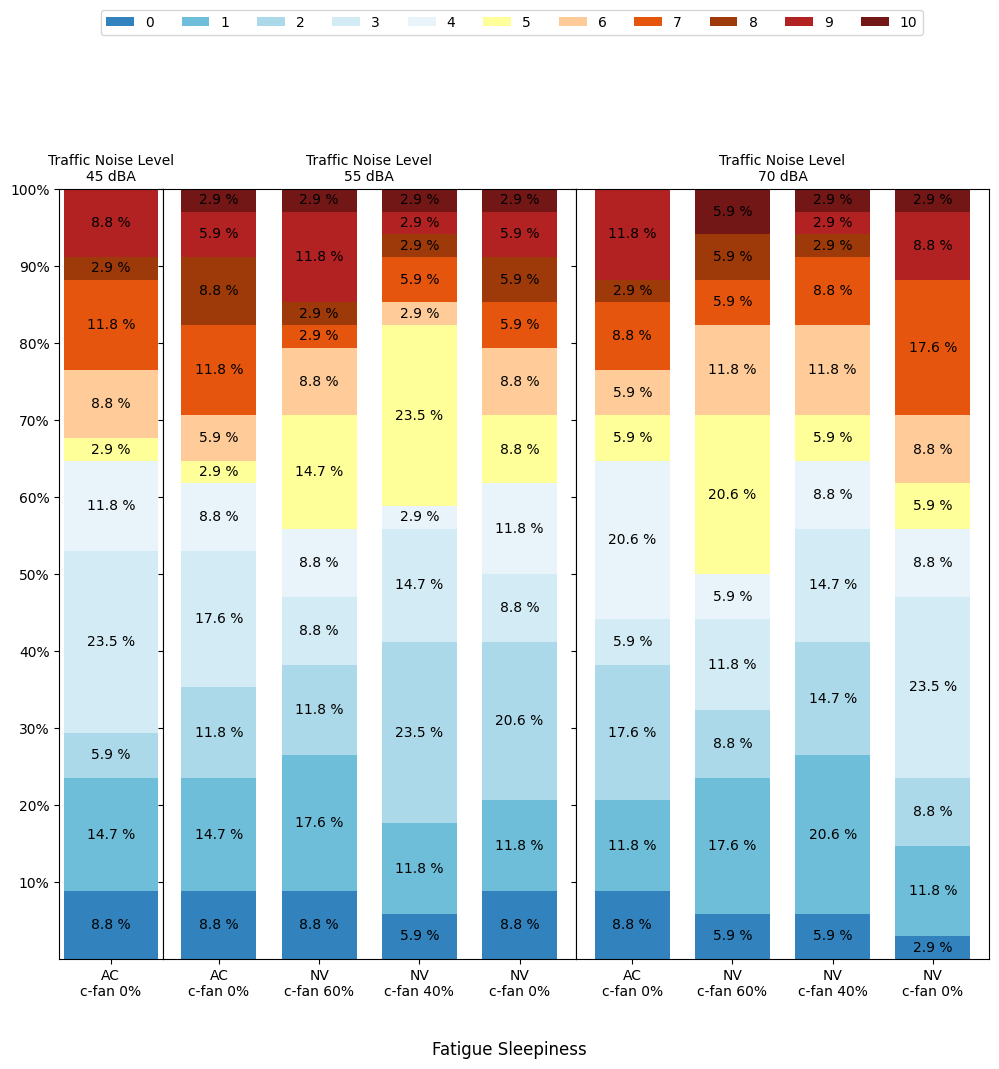

C:\Users\ZENI\AppData\Local\Temp\ipykernel_1388\873614949.py:38: RuntimeWarning: invalid value encountered in divide
  data_y[tf][item] = data_y[tf][item]/snum*100


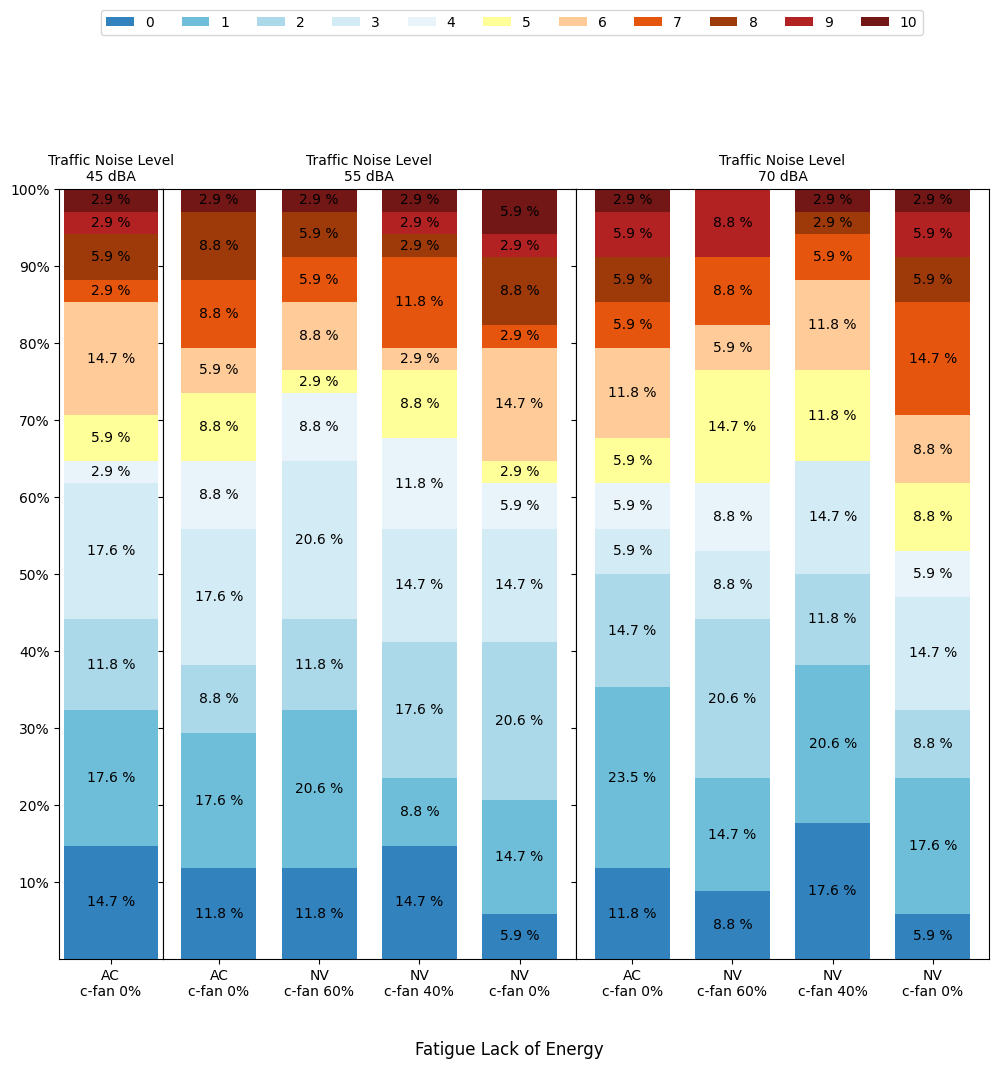

In [28]:
col_x = [
    'Fatigue_PhysicalExertion',
    'Fatigue_PhysicalDiscomfort', 'Fatigue_LackofMotivation',
    'Fatigue_Sleepiness', 'Fatigue_LackofEnergy'
    ]
col_x_labels = [
    'Fatigue Physical Exertion',
    'Fatigue Physical Discomfort', 'Fatigue Lack of Motivation',
    'Fatigue Sleepiness', 'Fatigue Lack of Energy'
]
group = ['Thermal', 'Traffic noise levels']
data_fat = data[col_x+group].copy()

custom_dict = {'AC':1, 'NV fan 5':2, 'NV fan 3':3,'NV fan 0':4,} 
data_fat.sort_values(by=['Thermal'], key=lambda x: x.map(custom_dict), inplace=True)
data_fat.reset_index(inplace=True)
colors = [("#3182bd"), ("#6ebed9"), ("#abd9e9"), ("#d3ebf4"),("#e8f4f9"),("#ffff99"), ("#ffcc99"),("#e6550d"), ("#9e3a09"), ('#B22222'), ("#721616")]
y_value = [0,1,2,3,4,5,6,7,8,9,10]
labels = [0,1,2,3,4,5,6,7,8,9,10]

for index,item in enumerate(col_x):
    create_plot(data_fat, y_value, item, colors, labels, col_x_labels[index])

# Mood

In [29]:
def create_plot(data_master, y, x_col, colors, labels, col_x_labels):
    '''
    data_master: will be the data
    y: the unique value of x_col
    x_col: choose the column that want to be plotted
    colors: the length of colors must be the same within y
    labels: the meaning of y value
    col_x_labels: sb x title
    '''

    # Prepare the data
    x = ['AC', 'NV fan 5', 'NV fan 3', 'NV fan 0']
    x_labels = ['AC\nc-fan 0%', 'NV\nc-fan 60%', 'NV\nc-fan 40%', 'NV\nc-fan 0%']
    tnl = [45,55,70]
    data_y = {}

    for tf in tnl:
        data_y[tf] = {}
        for item in y:
            for group in x:
                data_slice = data_master[(data_master[x_col]==item) & (data_master['Traffic noise levels']==tf) & (data_master['Thermal'] == group)].copy()
                res = len(data_slice)

                if data_y[tf].get(item, None):
                    data_y[tf][item].append(res)
                else:
                    data_y[tf][item] = []
                    data_y[tf][item].append(res)
            data_y[tf][item] = np.array(data_y[tf][item])

    # memo of sample number
    for tf in tnl:
        snum = data_y[tf][4]
        for item in y:
            snum = snum + data_y[tf][item]
        snum = snum - data_y[tf][4]
        for item in y:
            data_y[tf][item] = data_y[tf][item]/snum*100

    # stack bars
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True,  gridspec_kw={'width_ratios': [1, 4, 4]})
    fig.supxlabel(col_x_labels, fontsize=12)
    fig.set_figwidth(12)
    fig.set_figheight(10)
    ax1.set_title('Traffic Noise Level\n45 dBA', fontsize=10)
    ax2.set_title('Traffic Noise Level\n55 dBA', fontsize=10)
    ax3.set_title('Traffic Noise Level\n70 dBA', fontsize=10)
    plt.ylim(0,100)
    plt.subplots_adjust(wspace=0)
    plt.yticks(ticks = [10,20,30,40,50,60,70,80,90,100], labels=['10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'])
    bar_width = 0.75

    # loop for tnl 55
    for index, item in enumerate(y):
        # data_y[55][list(data_y[55].keys())[index]]
        if index == 0:
            ax2.bar(x_labels, data_y[55][item], label=labels[index], color = colors[index], width=bar_width)
            sbot = data_y[55][item]
            for xpos, ypos, yval in zip(x_labels, sbot/2, sbot):
                if yval > 0:
                    ax2.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
        else:
            ax2.bar(x_labels, data_y[55][item], bottom=sbot, label=labels[index], color = colors[index], width=bar_width)
            for xpos, ypos, yval in zip(x_labels, sbot+data_y[55][item]/2, data_y[55][item]):
                if yval > 0:
                    ax2.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
            sbot += data_y[55][item]

    # loop for tnl 70
    for index, item in enumerate(y):
        # data_y[70][list(data_y[70].keys())[index-1]]
        if index == 0:
            ax3.bar(x_labels, data_y[70][item], label=labels[index], color = colors[index], width=bar_width)
            sbot = data_y[70][item]
            for xpos, ypos, yval in zip(x_labels, sbot/2, sbot):
                if yval > 0:
                    ax3.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
        else:
            ax3.bar(x_labels, data_y[70][item], bottom=sbot, label=labels[index], color = colors[index], width=bar_width)
            for xpos, ypos, yval in zip(x_labels, sbot+data_y[70][item]/2, data_y[70][item]):
                if yval > 0:
                    ax3.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
            sbot += data_y[70][item]

    # loop for tnl 45
    for index, item in enumerate(y):
        # data_y[45][list(data_y[45].keys())[index-1]]
        if index == 0:
            ax1.bar(x_labels, data_y[45][item], label=labels[index], color = colors[index], width=bar_width)
            sbot = data_y[45][item]
            for xpos, ypos, yval in zip(x_labels, sbot/2, sbot):
                if yval > 0:
                    ax1.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
        else:
            ax1.bar(x_labels, data_y[45][item], bottom=sbot, label=labels[index], color = colors[index], width=bar_width)
            for xpos, ypos, yval in zip(x_labels, sbot+data_y[45][item]/2, data_y[45][item]):
                if yval > 0:
                    ax1.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
            sbot += data_y[45][item]

    plt.legend(bbox_to_anchor=(-.9,1.2), loc='lower left', ncol=len(colors), borderaxespad=0.)
    plt.show()

C:\Users\ZENI\AppData\Local\Temp\ipykernel_1388\306217370.py:38: RuntimeWarning: invalid value encountered in divide
  data_y[tf][item] = data_y[tf][item]/snum*100


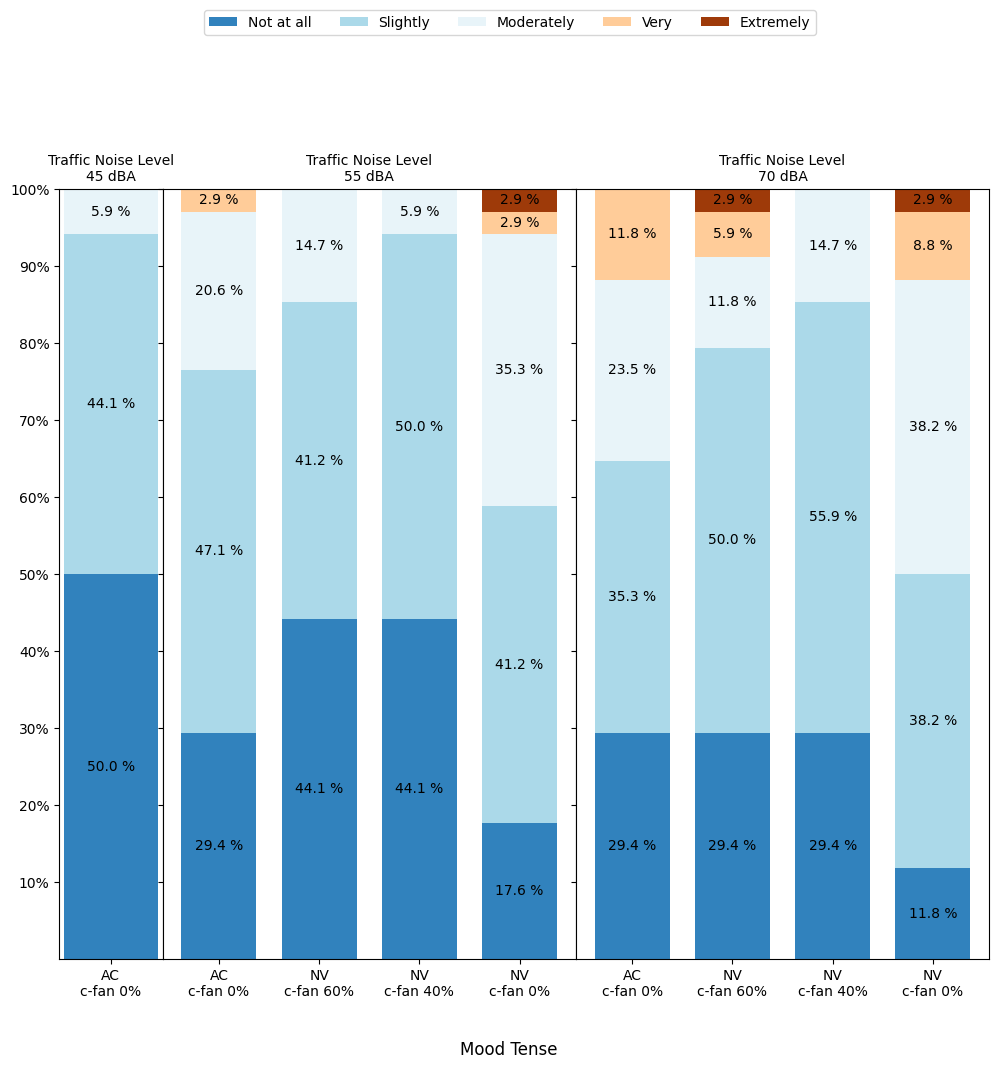

C:\Users\ZENI\AppData\Local\Temp\ipykernel_1388\306217370.py:38: RuntimeWarning: invalid value encountered in divide
  data_y[tf][item] = data_y[tf][item]/snum*100


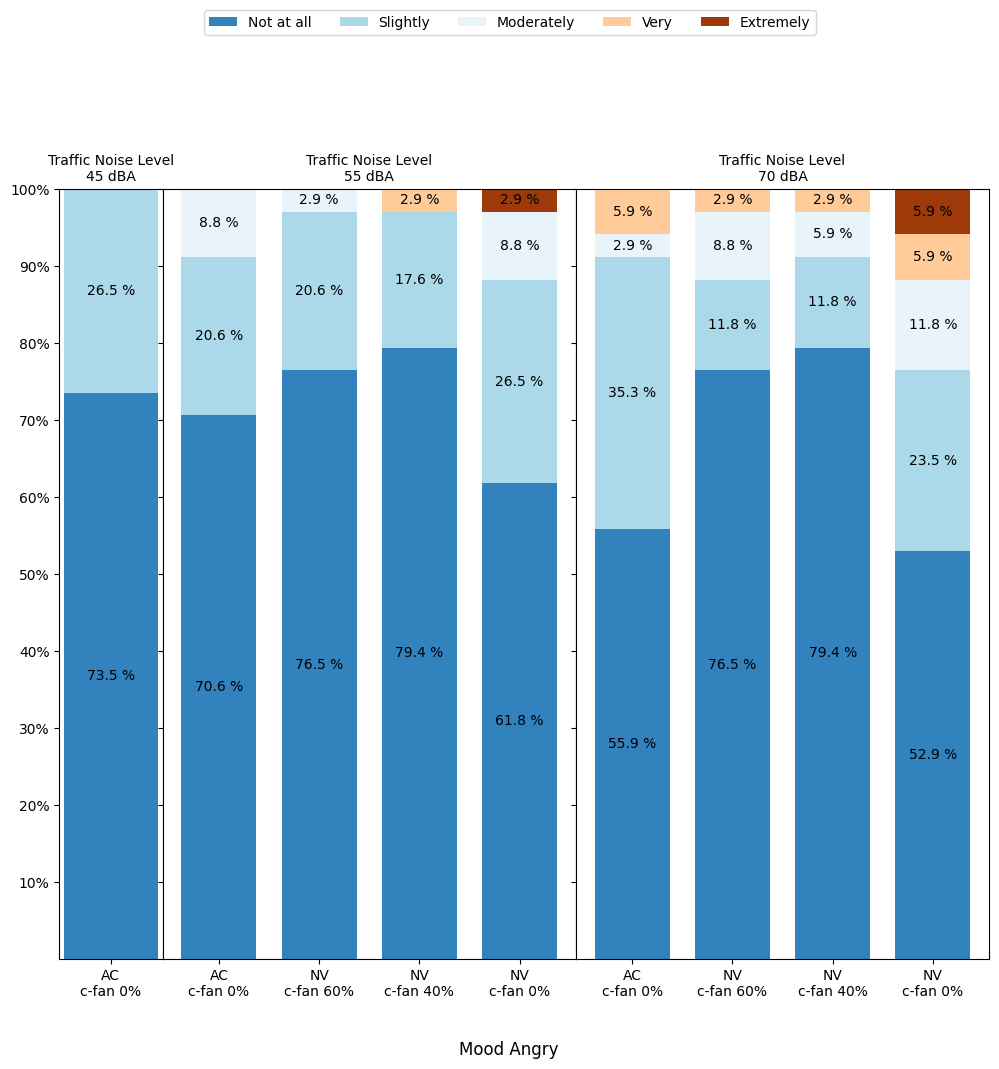

C:\Users\ZENI\AppData\Local\Temp\ipykernel_1388\306217370.py:38: RuntimeWarning: invalid value encountered in divide
  data_y[tf][item] = data_y[tf][item]/snum*100


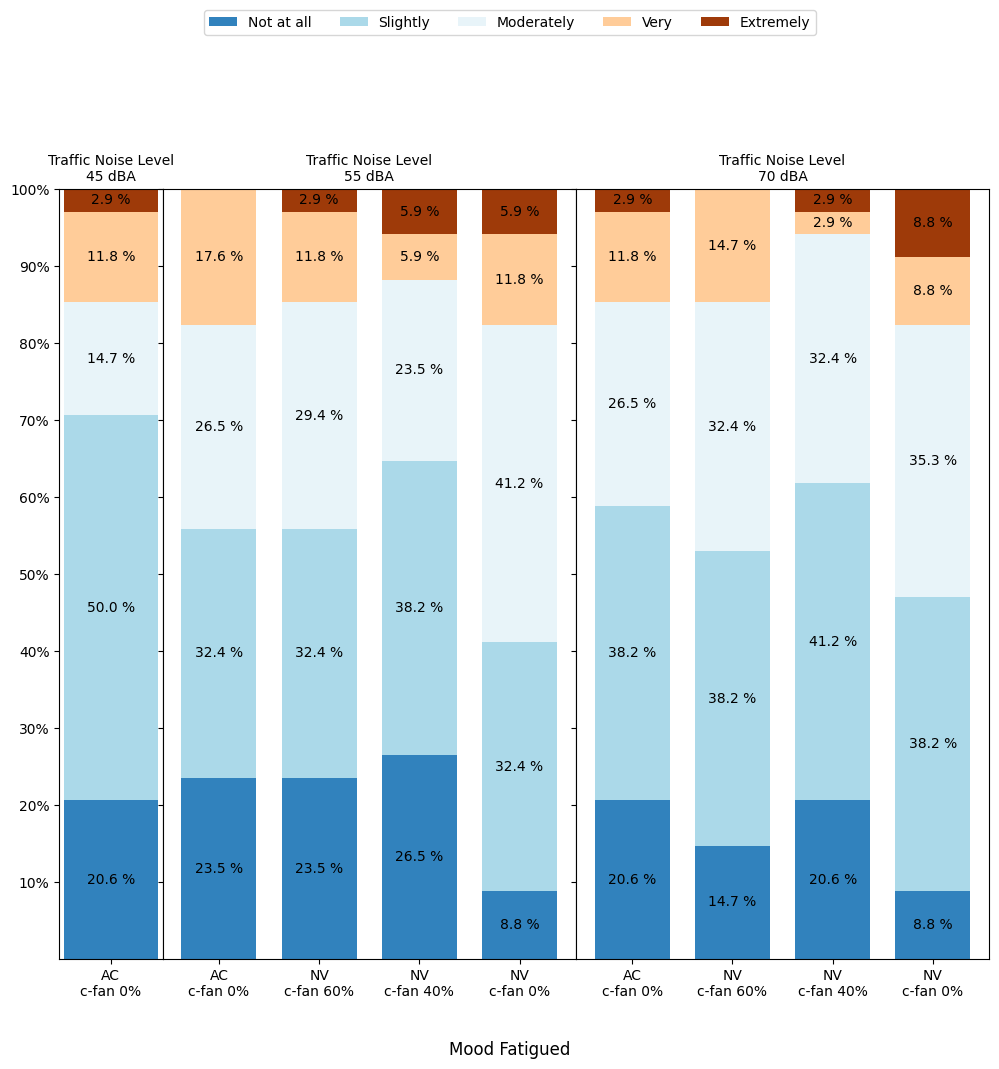

C:\Users\ZENI\AppData\Local\Temp\ipykernel_1388\306217370.py:38: RuntimeWarning: invalid value encountered in divide
  data_y[tf][item] = data_y[tf][item]/snum*100


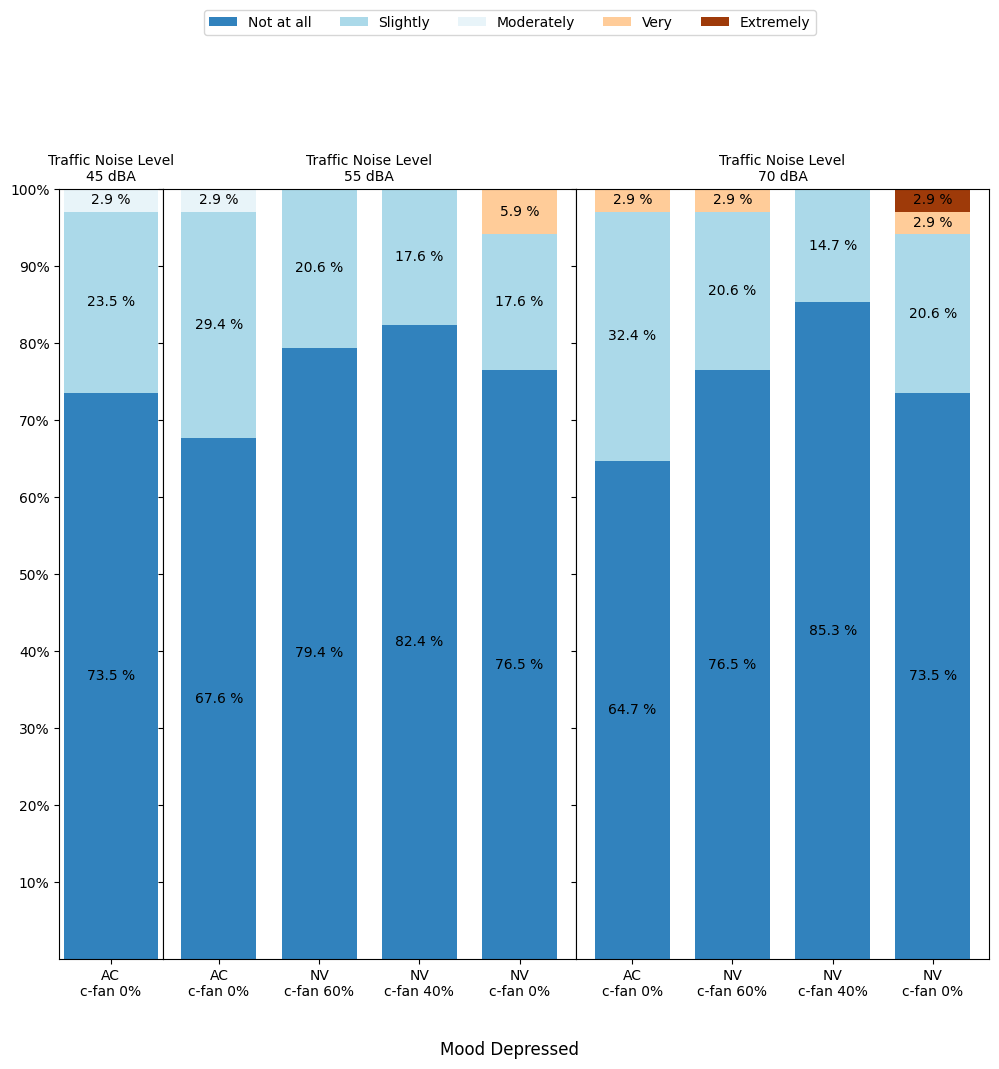

C:\Users\ZENI\AppData\Local\Temp\ipykernel_1388\306217370.py:38: RuntimeWarning: invalid value encountered in divide
  data_y[tf][item] = data_y[tf][item]/snum*100


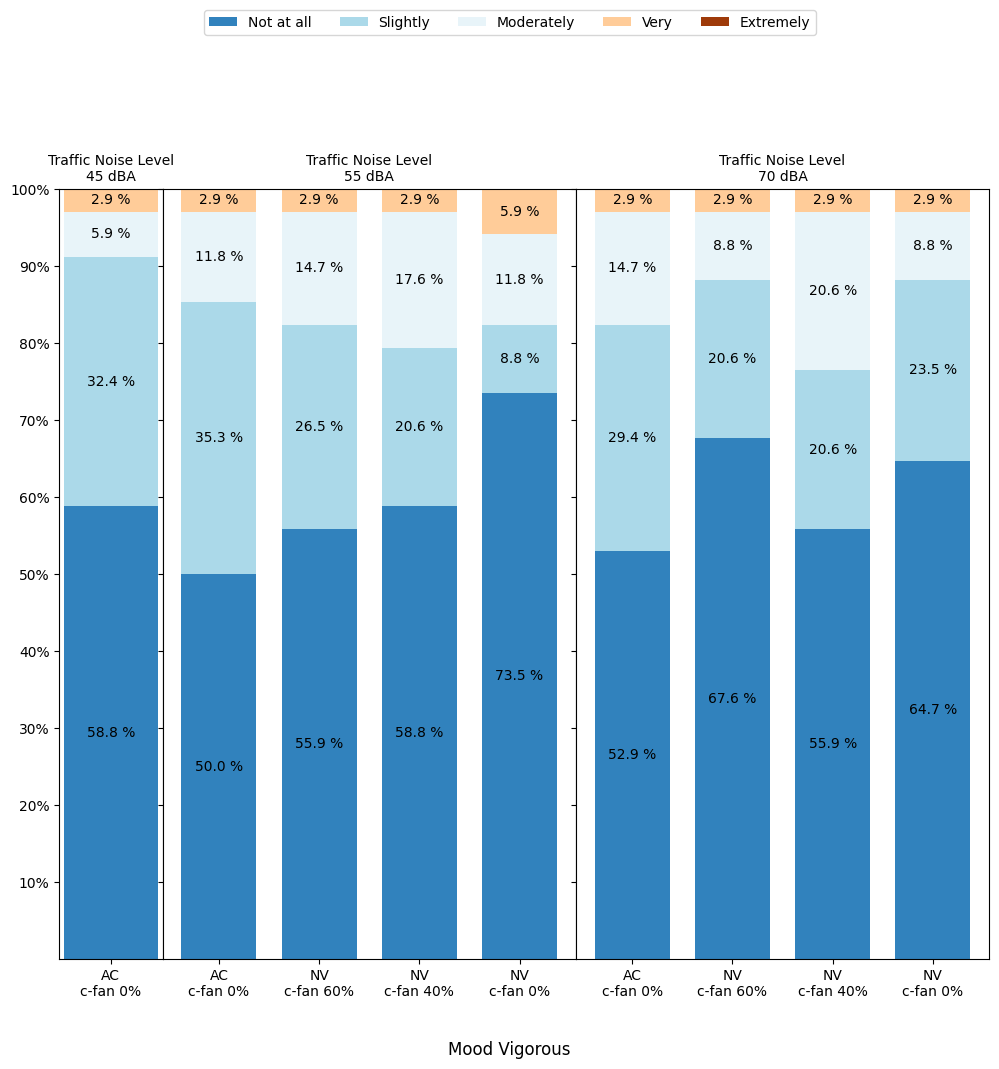

C:\Users\ZENI\AppData\Local\Temp\ipykernel_1388\306217370.py:38: RuntimeWarning: invalid value encountered in divide
  data_y[tf][item] = data_y[tf][item]/snum*100


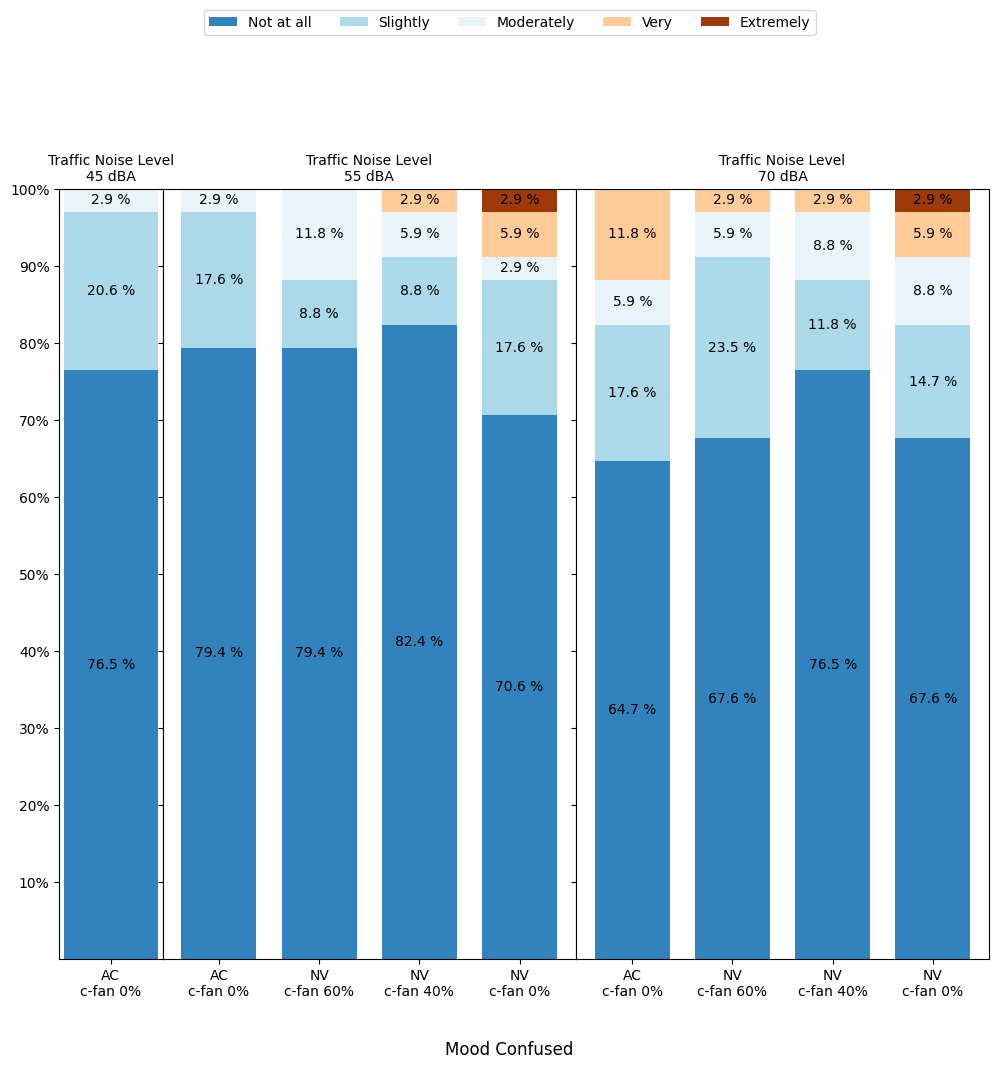

In [30]:
col_x = [
    'Mood_tense', 'Mood_angry', 'Mood_fatigued', 'Mood_depressed',
    'Mood_vigorous', 'Mood_confused',
    ]
col_x_labels = [
    'Mood Tense', 'Mood Angry', 'Mood Fatigued', 'Mood Depressed',
    'Mood Vigorous', 'Mood Confused',
    ]
group = ['Thermal', 'Traffic noise levels']
data_fat = data[col_x+group].copy()

custom_dict = {'AC':1, 'NV fan 5':2, 'NV fan 3':3,'NV fan 0':4,} 
data_fat.sort_values(by=['Thermal'], key=lambda x: x.map(custom_dict), inplace=True)
data_fat.reset_index(inplace=True)
colors = [("#3182bd"), ("#abd9e9"), ("#e8f4f9"), ("#ffcc99"), ("#9e3a09"), ("#721616")]
y_value = [1,2,3,4,5]
labels = ["Not at all", "Slightly", "Moderately", "Very", "Extremely"]

for index,item in enumerate(col_x):
    create_plot(data_fat, y_value, item, colors, labels, col_x_labels[index])

# Workload

In [31]:
def create_plot(data_master, y, x_col, colors, labels, col_x_labels):
    '''
    data_master: will be the data
    y: the unique value of x_col
    x_col: choose the column that want to be plotted
    colors: the length of colors must be the same within y
    labels: the meaning of y value
    col_x_labels: sb x title
    '''

    # Prepare the data
    x = ['AC', 'NV fan 5', 'NV fan 3', 'NV fan 0']
    x_labels = ['AC\nc-fan 0%', 'NV\nc-fan 60%', 'NV\nc-fan 40%', 'NV\nc-fan 0%']
    tnl = [45,55,70]
    data_y = {}

    for tf in tnl:
        data_y[tf] = {}
        for item in y:
            for group in x:
                data_slice = data_master[(data_master[x_col]==item) & (data_master['Traffic noise levels']==tf) & (data_master['Thermal'] == group)].copy()
                res = len(data_slice)

                if data_y[tf].get(item, None):
                    data_y[tf][item].append(res)
                else:
                    data_y[tf][item] = []
                    data_y[tf][item].append(res)
            data_y[tf][item] = np.array(data_y[tf][item])

    # memo of sample number
    for tf in tnl:
        snum = data_y[tf][4]
        for item in y:
            snum = snum + data_y[tf][item]
        snum = snum - data_y[tf][4]
        for item in y:
            data_y[tf][item] = data_y[tf][item]/snum*100

    # stack bars
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True,  gridspec_kw={'width_ratios': [1, 4, 4]})
    fig.supxlabel(col_x_labels, fontsize=12)
    fig.set_figwidth(12)
    fig.set_figheight(10)
    ax1.set_title('Traffic Noise Level\n45 dBA', fontsize=10)
    ax2.set_title('Traffic Noise Level\n55 dBA', fontsize=10)
    ax3.set_title('Traffic Noise Level\n70 dBA', fontsize=10)
    plt.ylim(0,100)
    plt.subplots_adjust(wspace=0)
    plt.yticks(ticks = [10,20,30,40,50,60,70,80,90,100], labels=['10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'])
    bar_width = 0.75

    # loop for tnl 55
    for index, item in enumerate(y):
        # data_y[55][list(data_y[55].keys())[index]]
        if index == 0:
            ax2.bar(x_labels, data_y[55][item], label=labels[index], color = colors[index], width=bar_width)
            sbot = data_y[55][item]
            for xpos, ypos, yval in zip(x_labels, sbot/2, sbot):
                if yval > 0:
                    ax2.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
        else:
            ax2.bar(x_labels, data_y[55][item], bottom=sbot, label=labels[index], color = colors[index], width=bar_width)
            for xpos, ypos, yval in zip(x_labels, sbot+data_y[55][item]/2, data_y[55][item]):
                if yval > 0:
                    ax2.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
            sbot += data_y[55][item]

    # loop for tnl 70
    for index, item in enumerate(y):
        # data_y[70][list(data_y[70].keys())[index-1]]
        if index == 0:
            ax3.bar(x_labels, data_y[70][item], label=labels[index], color = colors[index], width=bar_width)
            sbot = data_y[70][item]
            for xpos, ypos, yval in zip(x_labels, sbot/2, sbot):
                if yval > 0:
                    ax3.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
        else:
            ax3.bar(x_labels, data_y[70][item], bottom=sbot, label=labels[index], color = colors[index], width=bar_width)
            for xpos, ypos, yval in zip(x_labels, sbot+data_y[70][item]/2, data_y[70][item]):
                if yval > 0:
                    ax3.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
            sbot += data_y[70][item]

    # loop for tnl 45
    for index, item in enumerate(y):
        # data_y[45][list(data_y[45].keys())[index-1]]
        if index == 0:
            ax1.bar(x_labels, data_y[45][item], label=labels[index], color = colors[index], width=bar_width)
            sbot = data_y[45][item]
            for xpos, ypos, yval in zip(x_labels, sbot/2, sbot):
                if yval > 0:
                    ax1.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
        else:
            ax1.bar(x_labels, data_y[45][item], bottom=sbot, label=labels[index], color = colors[index], width=bar_width)
            for xpos, ypos, yval in zip(x_labels, sbot+data_y[45][item]/2, data_y[45][item]):
                if yval > 0:
                    ax1.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
            sbot += data_y[45][item]

    plt.legend(bbox_to_anchor=(-1.15,1.2), loc='lower left', ncol=len(colors), borderaxespad=0.)
    plt.show()

C:\Users\ZENI\AppData\Local\Temp\ipykernel_1388\1568267684.py:38: RuntimeWarning: invalid value encountered in divide
  data_y[tf][item] = data_y[tf][item]/snum*100


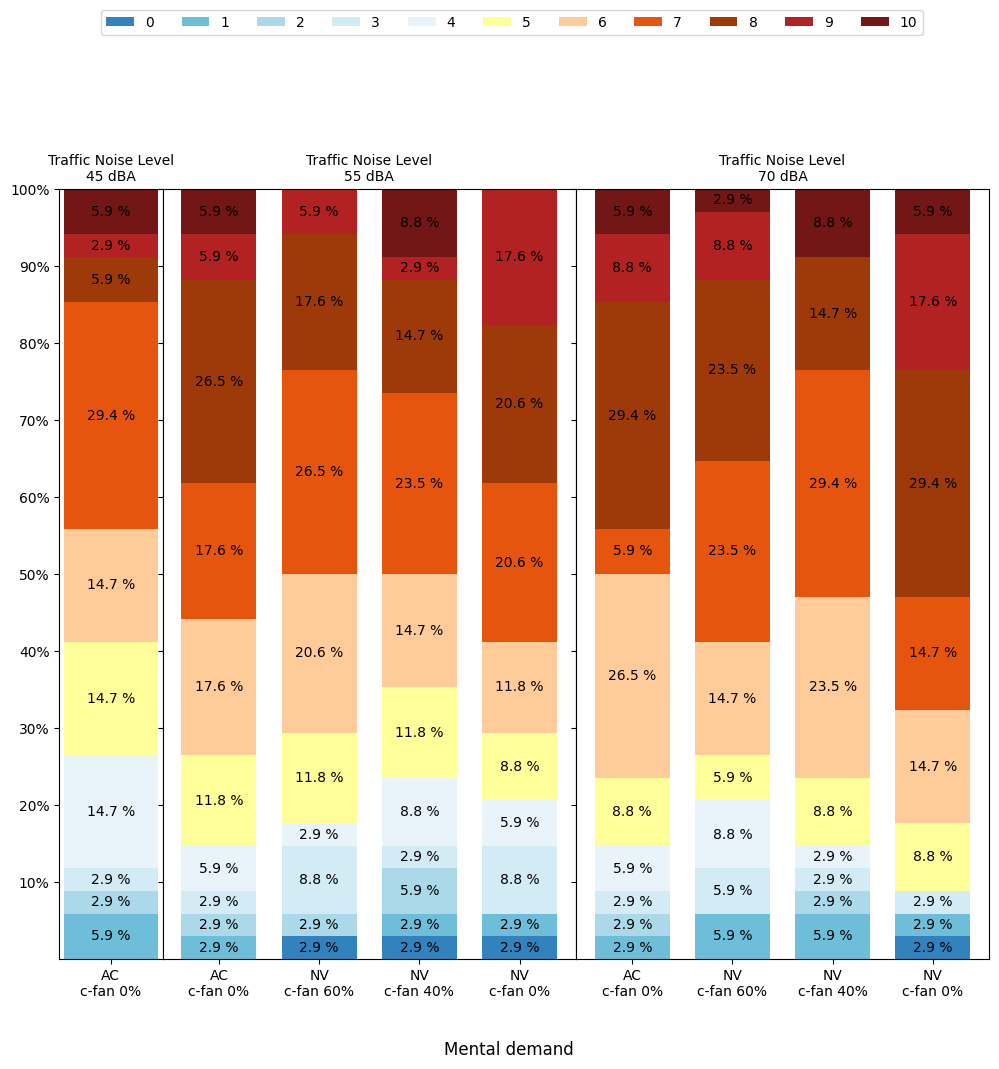

C:\Users\ZENI\AppData\Local\Temp\ipykernel_1388\1568267684.py:38: RuntimeWarning: invalid value encountered in divide
  data_y[tf][item] = data_y[tf][item]/snum*100


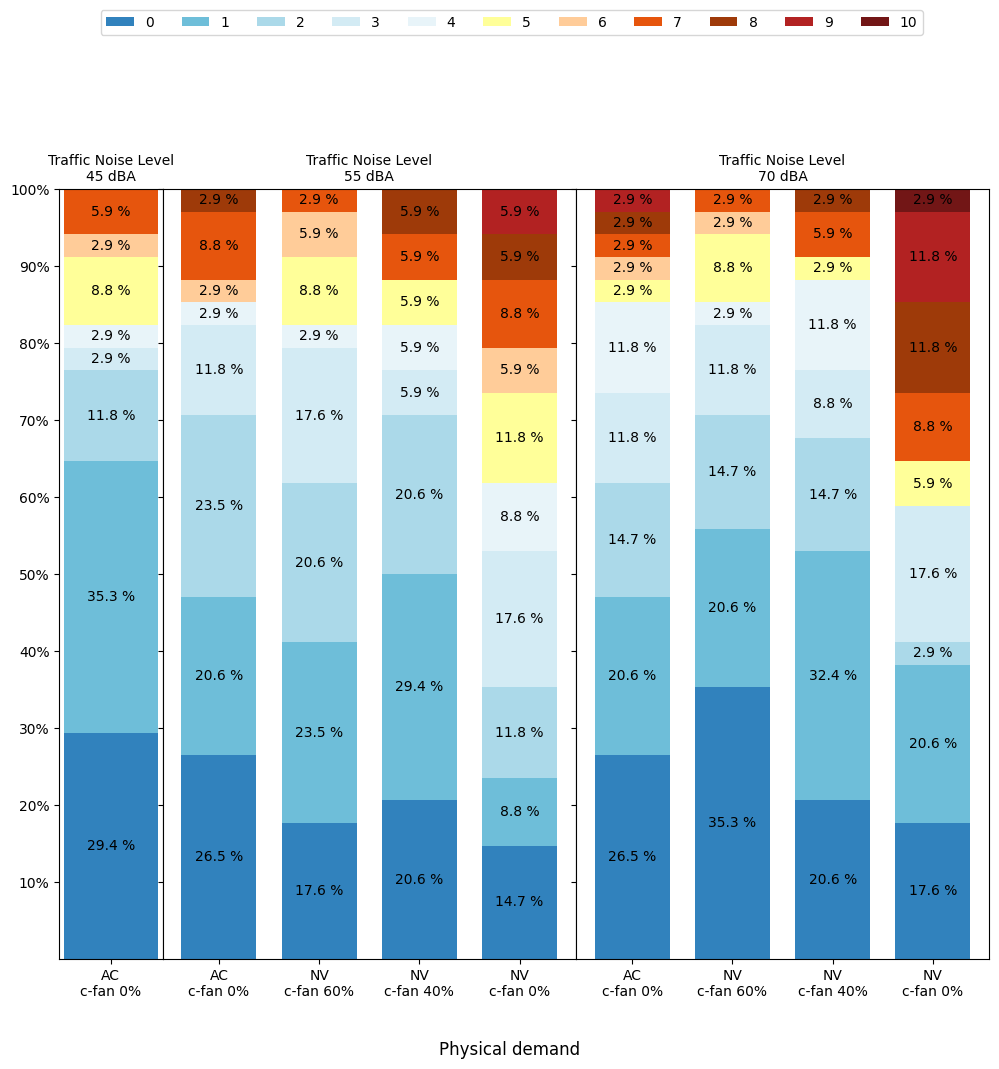

C:\Users\ZENI\AppData\Local\Temp\ipykernel_1388\1568267684.py:38: RuntimeWarning: invalid value encountered in divide
  data_y[tf][item] = data_y[tf][item]/snum*100


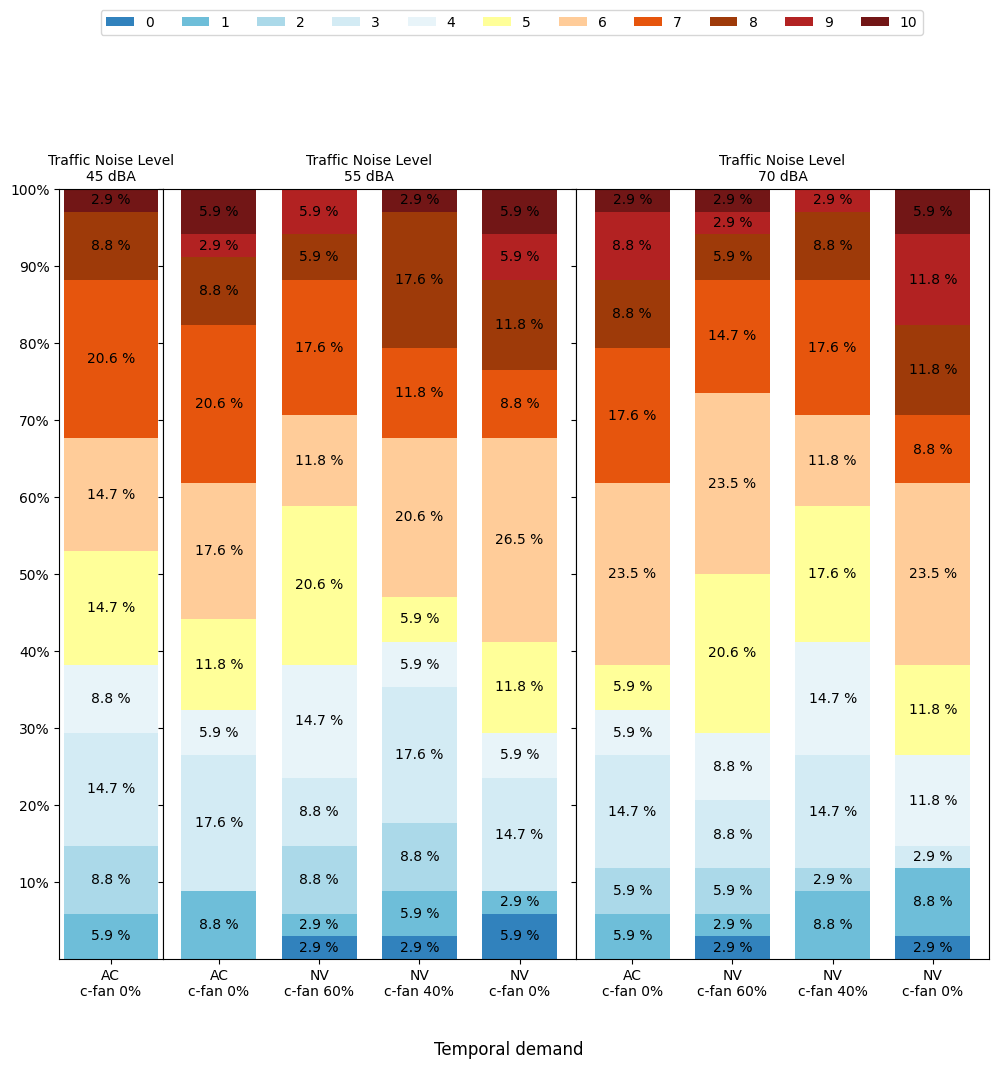

C:\Users\ZENI\AppData\Local\Temp\ipykernel_1388\1568267684.py:38: RuntimeWarning: invalid value encountered in divide
  data_y[tf][item] = data_y[tf][item]/snum*100


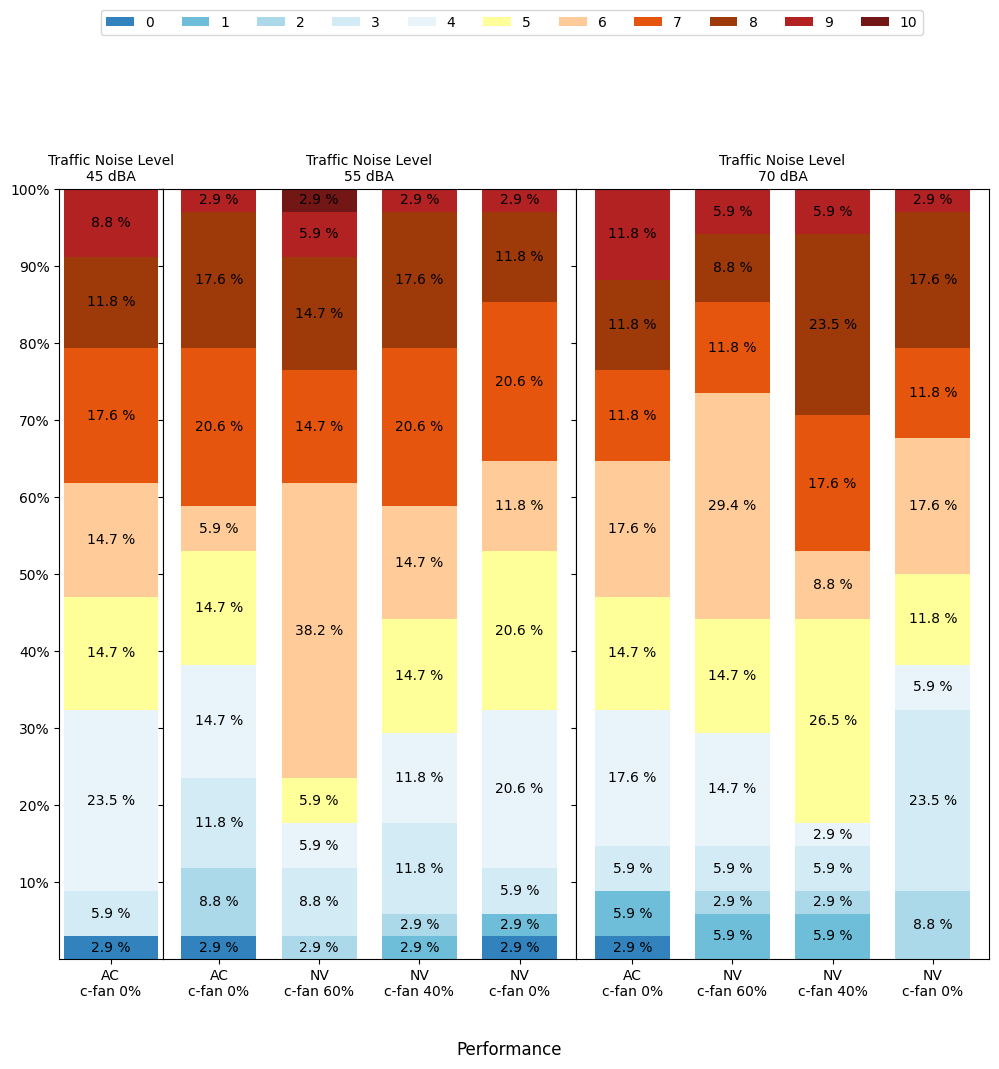

C:\Users\ZENI\AppData\Local\Temp\ipykernel_1388\1568267684.py:38: RuntimeWarning: invalid value encountered in divide
  data_y[tf][item] = data_y[tf][item]/snum*100


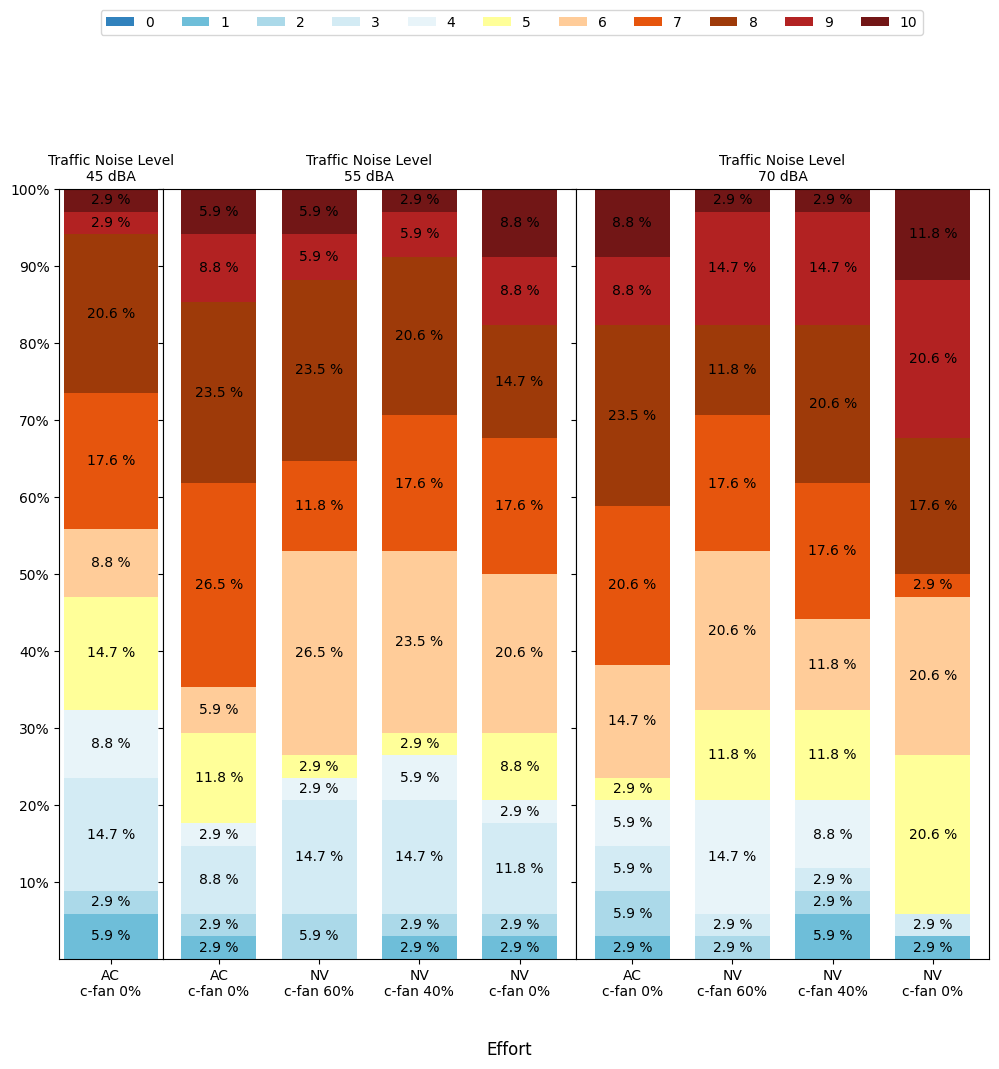

C:\Users\ZENI\AppData\Local\Temp\ipykernel_1388\1568267684.py:38: RuntimeWarning: invalid value encountered in divide
  data_y[tf][item] = data_y[tf][item]/snum*100


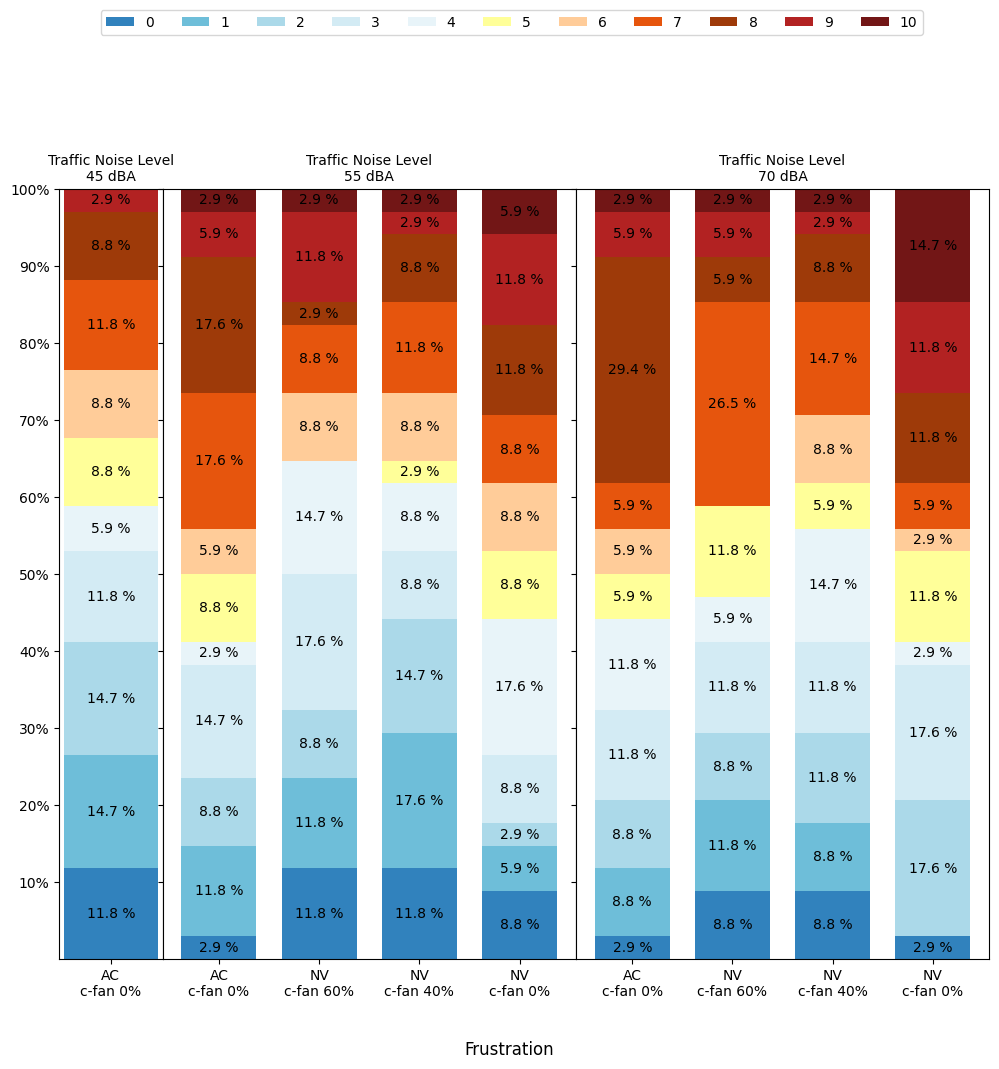

In [32]:
col_x = [
    'Mental demand', 'Physical demand',
    'Temporal demand', 'Performance', 'Effort', 'Frustration',
    ]
col_x_labels = [
    'Mental demand', 'Physical demand',
    'Temporal demand', 'Performance', 'Effort', 'Frustration',
    ]
group = ['Thermal', 'Traffic noise levels']
data_fat = data[col_x+group].copy()

custom_dict = {'AC':1, 'NV fan 5':2, 'NV fan 3':3,'NV fan 0':4,} 
data_fat.sort_values(by=['Thermal'], key=lambda x: x.map(custom_dict), inplace=True)
data_fat.reset_index(inplace=True)
colors = [("#3182bd"), ("#6ebed9"), ("#abd9e9"), ("#d3ebf4"),("#e8f4f9"),("#ffff99"), ("#ffcc99"),("#e6550d"), ("#9e3a09"), ('#B22222'), ("#721616")]
y_value = [0,1,2,3,4,5,6,7,8,9,10]
labels = [0,1,2,3,4,5,6,7,8,9,10]

for index,item in enumerate(col_x):
    create_plot(data_fat, y_value, item, colors, labels, col_x_labels[index])

# ENV Satisfaction

In [33]:
def create_plot(data_master, y, x_col, colors, labels, col_x_labels, leg_pos = -1.1):
    '''
    data_master: will be the data
    y: the unique value of x_col
    x_col: choose the column that want to be plotted
    colors: the length of colors must be the same within y
    labels: the meaning of y value
    col_x_labels: sb x title
    '''

    # Prepare the data
    x = ['AC', 'NV fan 5', 'NV fan 3', 'NV fan 0']
    x_labels = ['AC\nc-fan 0%', 'NV\nc-fan 60%', 'NV\nc-fan 40%', 'NV\nc-fan 0%']
    tnl = [45,55,70]
    data_y = {}

    for tf in tnl:
        data_y[tf] = {}
        for item in y:
            for group in x:
                data_slice = data_master[(data_master[x_col]==item) & (data_master['Traffic noise levels']==tf) & (data_master['Thermal'] == group)].copy()
                res = len(data_slice)

                if data_y[tf].get(item, None):
                    data_y[tf][item].append(res)
                else:
                    data_y[tf][item] = []
                    data_y[tf][item].append(res)
            data_y[tf][item] = np.array(data_y[tf][item])

    # memo of sample number
    for tf in tnl:
        snum = data_y[tf][4]
        for item in y:
            snum = snum + data_y[tf][item]
        snum = snum - data_y[tf][4]
        for item in y:
            data_y[tf][item] = data_y[tf][item]/snum*100

    # stack bars
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True,  gridspec_kw={'width_ratios': [1, 4, 4]})
    fig.supxlabel(col_x_labels, fontsize=12)
    fig.set_figwidth(12)
    fig.set_figheight(10)
    ax1.set_title('Traffic Noise Level\n45 dBA', fontsize=10)
    ax2.set_title('Traffic Noise Level\n55 dBA', fontsize=10)
    ax3.set_title('Traffic Noise Level\n70 dBA', fontsize=10)
    plt.ylim(0,100)
    plt.subplots_adjust(wspace=0)
    plt.yticks(ticks = [10,20,30,40,50,60,70,80,90,100], labels=['10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'])
    bar_width = 0.75

    # loop for tnl 55
    for index, item in enumerate(y):
        # data_y[55][list(data_y[55].keys())[index]]
        if index == 0:
            ax2.bar(x_labels, data_y[55][item], label=labels[index], color = colors[index], width=bar_width)
            sbot = data_y[55][item]
            for xpos, ypos, yval in zip(x_labels, sbot/2, sbot):
                if yval > 0:
                    ax2.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
        else:
            ax2.bar(x_labels, data_y[55][item], bottom=sbot, label=labels[index], color = colors[index], width=bar_width)
            for xpos, ypos, yval in zip(x_labels, sbot+data_y[55][item]/2, data_y[55][item]):
                if yval > 0:
                    ax2.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
            sbot += data_y[55][item]

    # loop for tnl 70
    for index, item in enumerate(y):
        # data_y[70][list(data_y[70].keys())[index-1]]
        if index == 0:
            ax3.bar(x_labels, data_y[70][item], label=labels[index], color = colors[index], width=bar_width)
            sbot = data_y[70][item]
            for xpos, ypos, yval in zip(x_labels, sbot/2, sbot):
                if yval > 0:
                    ax3.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
        else:
            ax3.bar(x_labels, data_y[70][item], bottom=sbot, label=labels[index], color = colors[index], width=bar_width)
            for xpos, ypos, yval in zip(x_labels, sbot+data_y[70][item]/2, data_y[70][item]):
                if yval > 0:
                    ax3.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
            sbot += data_y[70][item]

    # loop for tnl 45
    for index, item in enumerate(y):
        # data_y[45][list(data_y[45].keys())[index-1]]
        if index == 0:
            ax1.bar(x_labels, data_y[45][item], label=labels[index], color = colors[index], width=bar_width)
            sbot = data_y[45][item]
            for xpos, ypos, yval in zip(x_labels, sbot/2, sbot):
                if yval > 0:
                    ax1.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
        else:
            ax1.bar(x_labels, data_y[45][item], bottom=sbot, label=labels[index], color = colors[index], width=bar_width)
            for xpos, ypos, yval in zip(x_labels, sbot+data_y[45][item]/2, data_y[45][item]):
                if yval > 0:
                    ax1.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
            sbot += data_y[45][item]

    plt.legend(bbox_to_anchor=(leg_pos,1.2), loc='lower left', ncol=len(colors), borderaxespad=0.)
    plt.show()

C:\Users\ZENI\AppData\Local\Temp\ipykernel_1388\2259367503.py:38: RuntimeWarning: invalid value encountered in divide
  data_y[tf][item] = data_y[tf][item]/snum*100


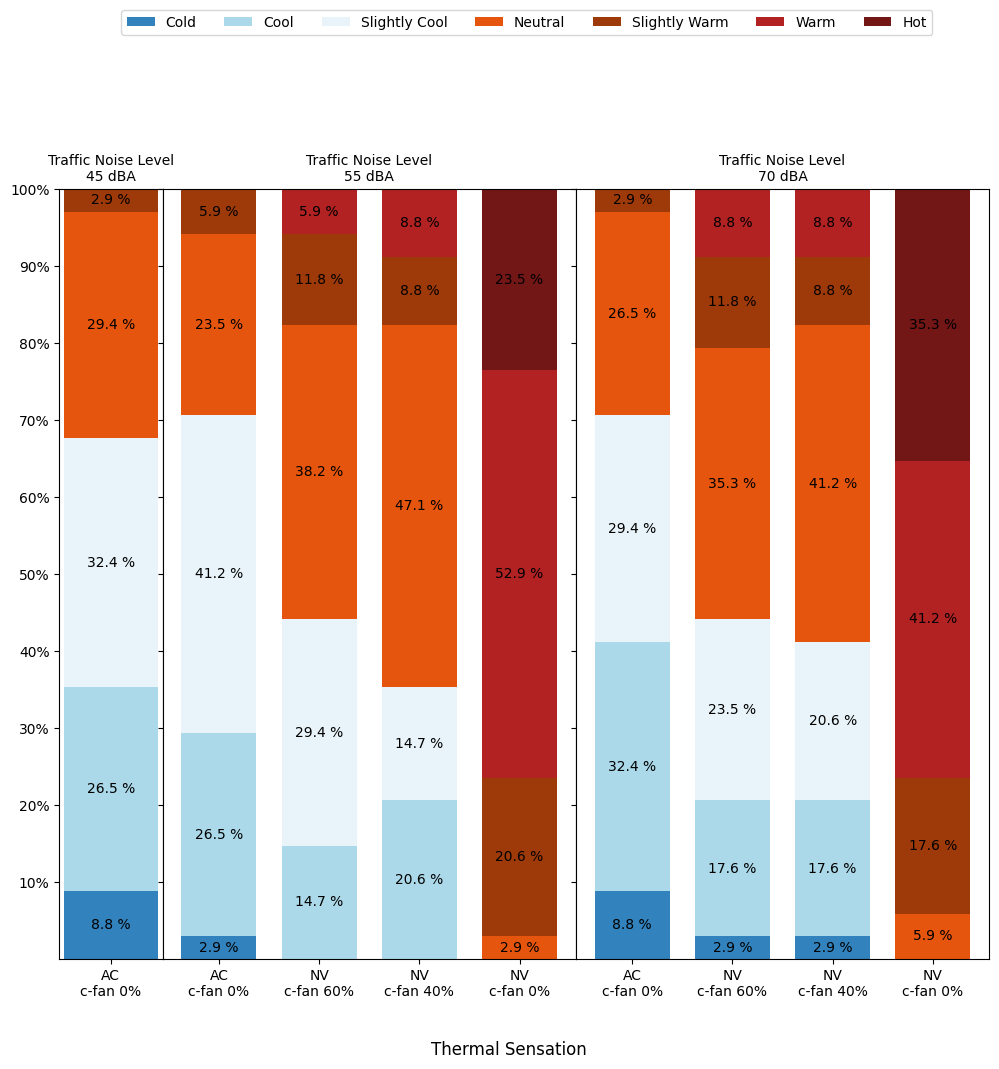

C:\Users\ZENI\AppData\Local\Temp\ipykernel_1388\2259367503.py:38: RuntimeWarning: invalid value encountered in divide
  data_y[tf][item] = data_y[tf][item]/snum*100


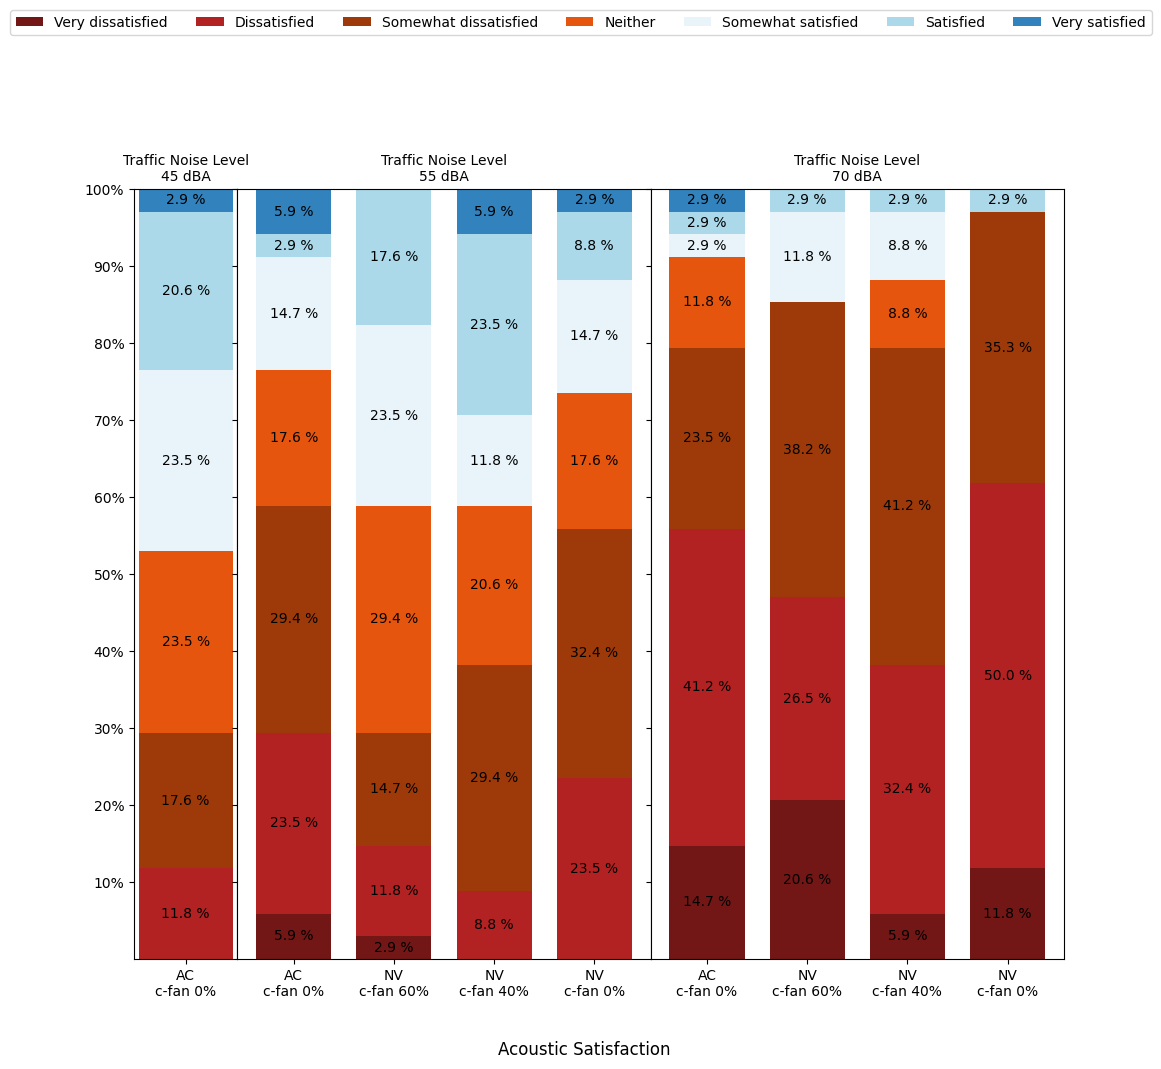

C:\Users\ZENI\AppData\Local\Temp\ipykernel_1388\2259367503.py:38: RuntimeWarning: invalid value encountered in divide
  data_y[tf][item] = data_y[tf][item]/snum*100


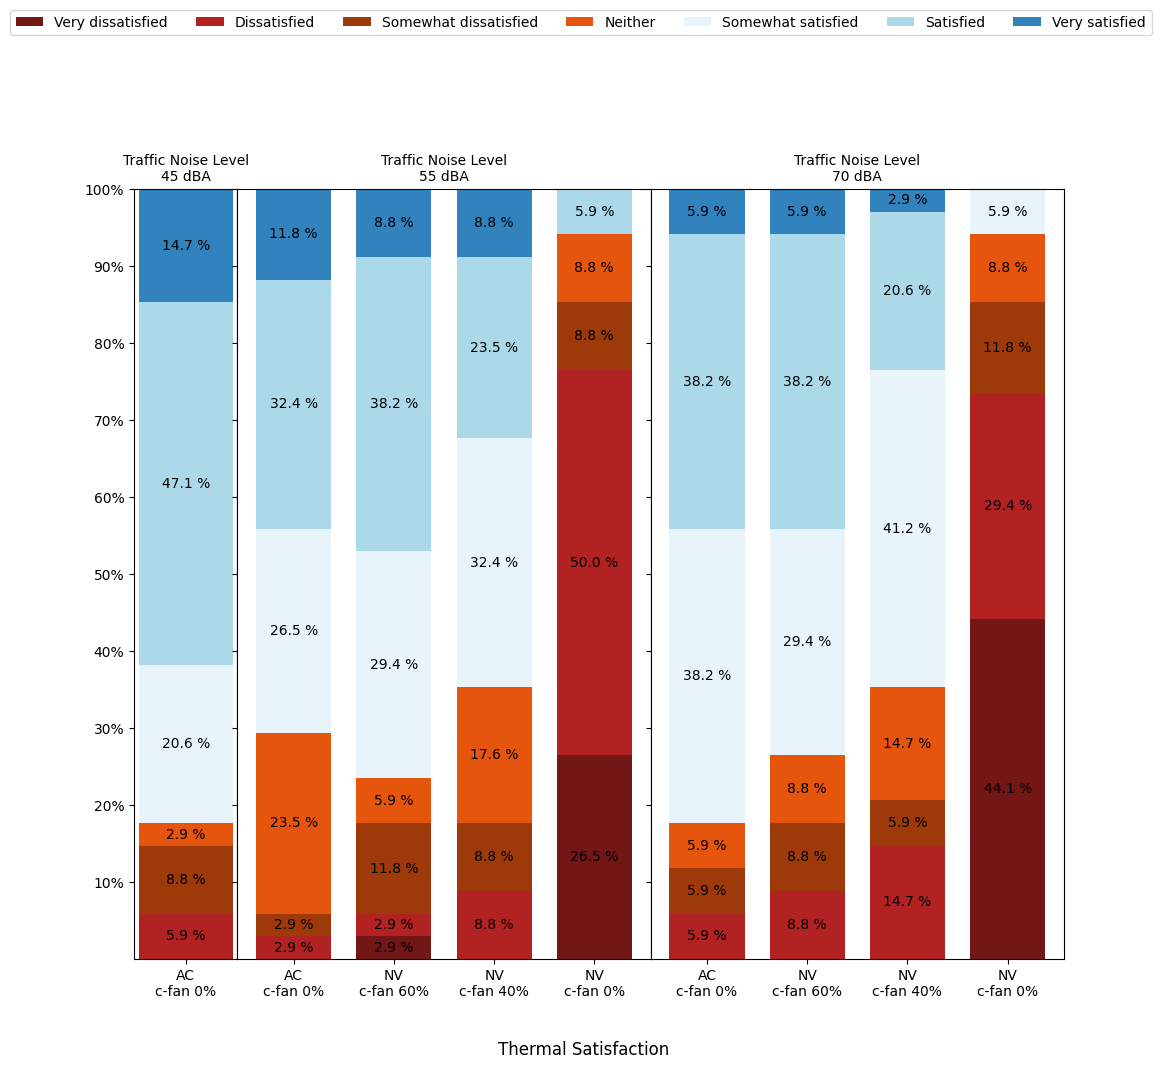

C:\Users\ZENI\AppData\Local\Temp\ipykernel_1388\2259367503.py:38: RuntimeWarning: invalid value encountered in divide
  data_y[tf][item] = data_y[tf][item]/snum*100


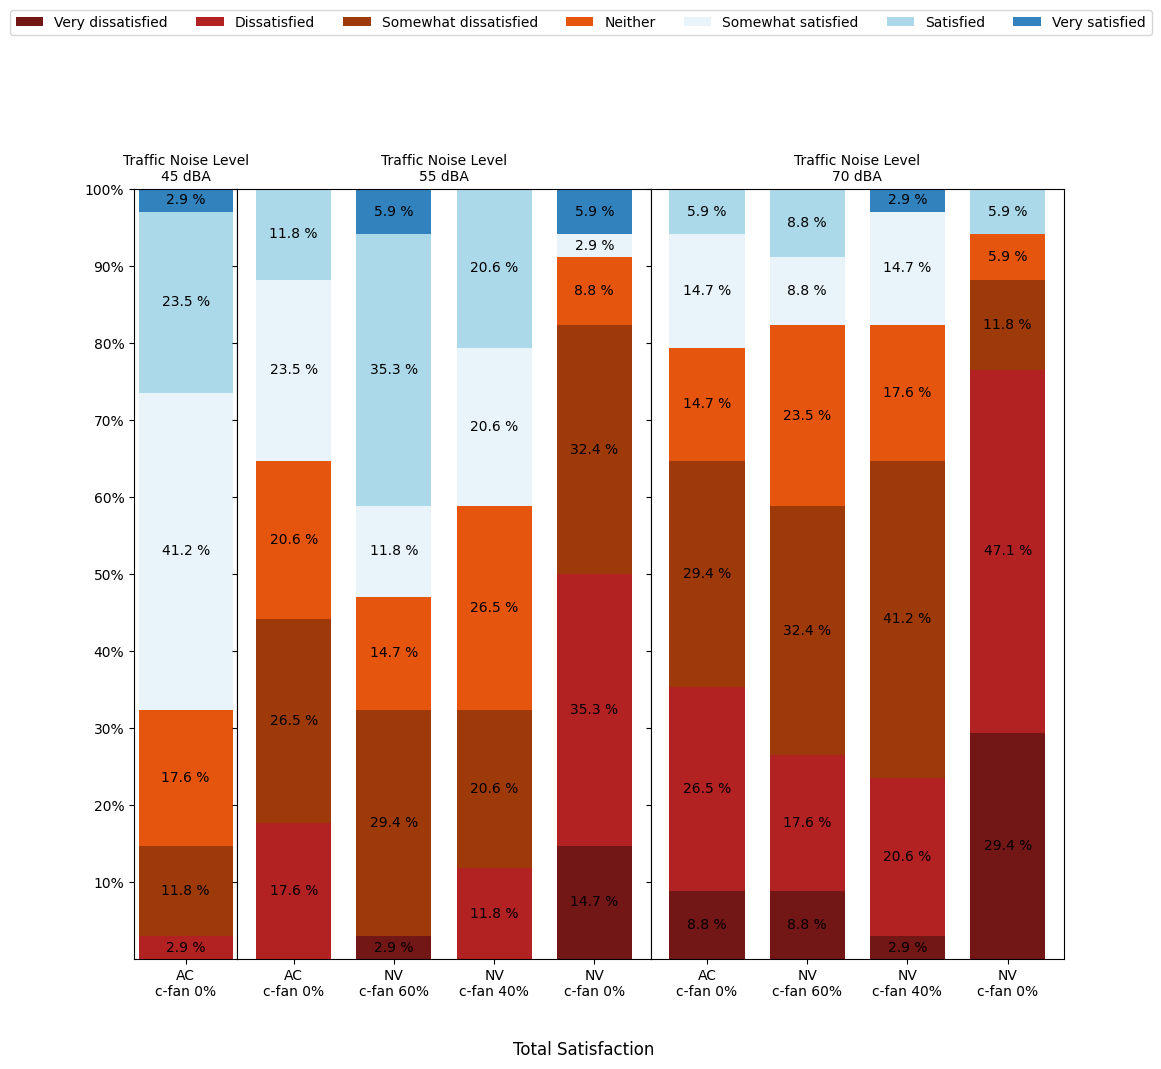

In [34]:
col_x = ['ThermalSensation','AcousticSatisfaction', 'ThermalSatisfaction', 'TotalSatisfaction']
col_x_labels = ['Thermal Sensation', 'Acoustic Satisfaction', 'Thermal Satisfaction', 'Total Satisfaction']
group = ['Thermal', 'Traffic noise levels']
data_fat = data[col_x+group].copy()

custom_dict = {'AC':1, 'NV fan 5':2, 'NV fan 3':3,'NV fan 0':4,} 
data_fat.sort_values(by=['Thermal'], key=lambda x: x.map(custom_dict), inplace=True)
data_fat.reset_index(inplace=True)
temp_col = [("#3182bd"), ("#abd9e9"), ("#e8f4f9"), ("#e6550d"), ("#9e3a09"), ('#B22222'), ("#721616")]
temp_col.reverse()
colors = [
    [("#3182bd"), ("#abd9e9"), ("#e8f4f9"), ("#e6550d"), ("#9e3a09"), ('#B22222'), ("#721616")],
    temp_col,
    temp_col,
    temp_col,
]
    
y_value = [1,2,3,4,5,6,7]
labels = [
    ['Cold', 'Cool', 'Slightly Cool', 'Neutral', 'Slightly Warm', 'Warm', 'Hot'],
    ['Very dissatisfied', 'Dissatisfied', 'Somewhat dissatisfied', 'Neither', 'Somewhat satisfied', 'Satisfied', 'Very satisfied'],
    ['Very dissatisfied', 'Dissatisfied', 'Somewhat dissatisfied', 'Neither', 'Somewhat satisfied', 'Satisfied', 'Very satisfied'],
    ['Very dissatisfied', 'Dissatisfied', 'Somewhat dissatisfied', 'Neither', 'Somewhat satisfied', 'Satisfied', 'Very satisfied'],
]
leg_pos = [
    -1.1,
    -1.55,
    -1.55,
    -1.55,
]

for index,item in enumerate(col_x):
    create_plot(data_fat, y_value, item, colors[index], labels[index], col_x_labels[index], leg_pos[index])

In [35]:
def create_plot(data_master, y, x_col, colors, labels, col_x_labels):
    '''
    data_master: will be the data
    y: the unique value of x_col
    x_col: choose the column that want to be plotted
    colors: the length of colors must be the same within y
    labels: the meaning of y value
    col_x_labels: sb x title
    '''

    # Prepare the data
    x = ['AC', 'NV fan 5', 'NV fan 3', 'NV fan 0']
    x_labels = ['AC\nc-fan 0%', 'NV\nc-fan 60%', 'NV\nc-fan 40%', 'NV\nc-fan 0%']
    tnl = [45,55,70]
    data_y = {}

    for tf in tnl:
        data_y[tf] = {}
        for item in y:
            for group in x:
                data_slice = data_master[(data_master[x_col]==item) & (data_master['Traffic noise levels']==tf) & (data_master['Thermal'] == group)].copy()
                res = len(data_slice)

                if data_y[tf].get(item, None):
                    data_y[tf][item].append(res)
                else:
                    data_y[tf][item] = []
                    data_y[tf][item].append(res)
            data_y[tf][item] = np.array(data_y[tf][item])

    # memo of sample number
    for tf in tnl:
        snum = data_y[tf][4]
        for item in y:
            snum = snum + data_y[tf][item]
        snum = snum - data_y[tf][4]
        for item in y:
            data_y[tf][item] = data_y[tf][item]/snum*100

    # stack bars
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True,  gridspec_kw={'width_ratios': [1, 4, 4]})
    fig.supxlabel(col_x_labels, fontsize=12)
    fig.set_figwidth(12)
    fig.set_figheight(10)
    ax1.set_title('Traffic Noise Level\n45 dBA', fontsize=10)
    ax2.set_title('Traffic Noise Level\n55 dBA', fontsize=10)
    ax3.set_title('Traffic Noise Level\n70 dBA', fontsize=10)
    plt.ylim(0,100)
    plt.subplots_adjust(wspace=0)
    plt.yticks(ticks = [10,20,30,40,50,60,70,80,90,100], labels=['10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'])
    bar_width = 0.75

    # loop for tnl 55
    for index, item in enumerate(y):
        # data_y[55][list(data_y[55].keys())[index]]
        if index == 0:
            ax2.bar(x_labels, data_y[55][item], label=labels[index], color = colors[index], width=bar_width)
            sbot = data_y[55][item]
            for xpos, ypos, yval in zip(x_labels, sbot/2, sbot):
                if yval > 0:
                    ax2.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
        else:
            ax2.bar(x_labels, data_y[55][item], bottom=sbot, label=labels[index], color = colors[index], width=bar_width)
            for xpos, ypos, yval in zip(x_labels, sbot+data_y[55][item]/2, data_y[55][item]):
                if yval > 0:
                    ax2.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
            sbot += data_y[55][item]

    # loop for tnl 70
    for index, item in enumerate(y):
        # data_y[70][list(data_y[70].keys())[index-1]]
        if index == 0:
            ax3.bar(x_labels, data_y[70][item], label=labels[index], color = colors[index], width=bar_width)
            sbot = data_y[70][item]
            for xpos, ypos, yval in zip(x_labels, sbot/2, sbot):
                if yval > 0:
                    ax3.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
        else:
            ax3.bar(x_labels, data_y[70][item], bottom=sbot, label=labels[index], color = colors[index], width=bar_width)
            for xpos, ypos, yval in zip(x_labels, sbot+data_y[70][item]/2, data_y[70][item]):
                if yval > 0:
                    ax3.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
            sbot += data_y[70][item]

    # loop for tnl 45
    for index, item in enumerate(y):
        # data_y[45][list(data_y[45].keys())[index-1]]
        if index == 0:
            ax1.bar(x_labels, data_y[45][item], label=labels[index], color = colors[index], width=bar_width)
            sbot = data_y[45][item]
            for xpos, ypos, yval in zip(x_labels, sbot/2, sbot):
                if yval > 0:
                    ax1.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
        else:
            ax1.bar(x_labels, data_y[45][item], bottom=sbot, label=labels[index], color = colors[index], width=bar_width)
            for xpos, ypos, yval in zip(x_labels, sbot+data_y[45][item]/2, data_y[45][item]):
                if yval > 0:
                    ax1.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
            sbot += data_y[45][item]

    plt.legend(bbox_to_anchor=(-1.1,1.2), loc='lower left', ncol=len(colors), borderaxespad=0.)
    plt.show()

C:\Users\ZENI\AppData\Local\Temp\ipykernel_1388\606130215.py:38: RuntimeWarning: invalid value encountered in divide
  data_y[tf][item] = data_y[tf][item]/snum*100


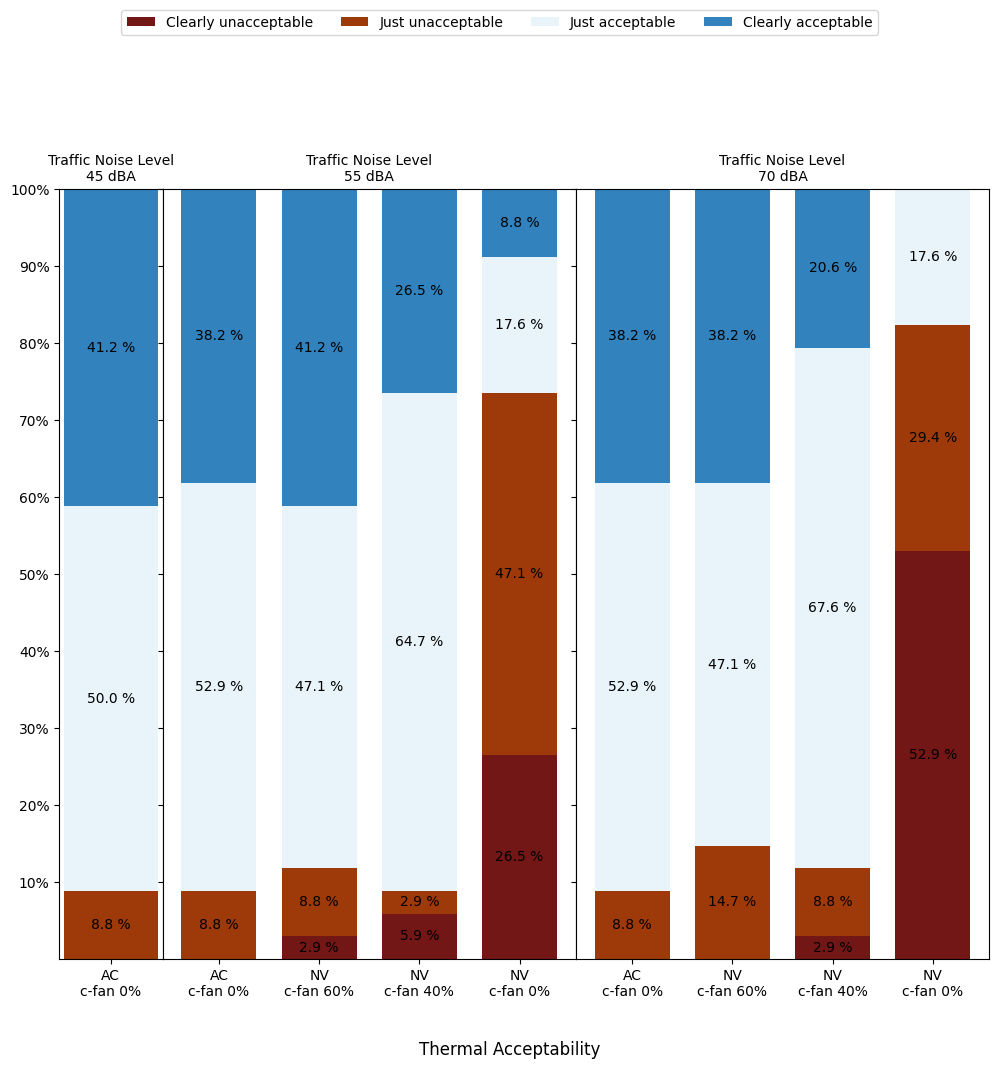

In [36]:
col_x = ['ThermalAcceptability']
col_x_labels = ['Thermal Acceptability']
group = ['Thermal', 'Traffic noise levels']
data_fat = data[col_x+group].copy()

custom_dict = {'AC':1, 'NV fan 5':2, 'NV fan 3':3,'NV fan 0':4,} 
data_fat.sort_values(by=['Thermal'], key=lambda x: x.map(custom_dict), inplace=True)
data_fat.reset_index(inplace=True)
colors = [("#721616"), ("#9e3a09"), ("#e8f4f9"), ("#3182bd")]
y_value = [1,2,3,4]
labels = ["Clearly unacceptable", "Just unacceptable", "Just acceptable", "Clearly acceptable"]

for index,item in enumerate(col_x):
    create_plot(data_fat, y_value, item, colors, labels, col_x_labels[index])

In [37]:
def create_plot(data_master, y, x_col, colors, labels, col_x_labels):
    '''
    data_master: will be the data
    y: the unique value of x_col
    x_col: choose the column that want to be plotted
    colors: the length of colors must be the same within y
    labels: the meaning of y value
    col_x_labels: sb x title
    '''

    # Prepare the data
    x = ['AC', 'NV fan 5', 'NV fan 3', 'NV fan 0']
    x_labels = ['AC\nc-fan 0%', 'NV\nc-fan 60%', 'NV\nc-fan 40%', 'NV\nc-fan 0%']
    tnl = [45,55,70]
    data_y = {}

    for tf in tnl:
        data_y[tf] = {}
        for item in y:
            for group in x:
                data_slice = data_master[(data_master[x_col]==item) & (data_master['Traffic noise levels']==tf) & (data_master['Thermal'] == group)].copy()
                res = len(data_slice)

                if data_y[tf].get(item, None):
                    data_y[tf][item].append(res)
                else:
                    data_y[tf][item] = []
                    data_y[tf][item].append(res)
            data_y[tf][item] = np.array(data_y[tf][item])

    # memo of sample number
    for tf in tnl:
        snum = data_y[tf][4]
        for item in y:
            snum = snum + data_y[tf][item]
        snum = snum - data_y[tf][4]
        for item in y:
            data_y[tf][item] = data_y[tf][item]/snum*100

    # stack bars
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True,  gridspec_kw={'width_ratios': [1, 4, 4]})
    fig.supxlabel(col_x_labels, fontsize=12)
    fig.set_figwidth(12)
    fig.set_figheight(10)
    ax1.set_title('Traffic Noise Level\n45 dBA', fontsize=10)
    ax2.set_title('Traffic Noise Level\n55 dBA', fontsize=10)
    ax3.set_title('Traffic Noise Level\n70 dBA', fontsize=10)
    plt.ylim(0,100)
    plt.subplots_adjust(wspace=0)
    plt.yticks(ticks = [10,20,30,40,50,60,70,80,90,100], labels=['10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'])
    bar_width = 0.75

    # loop for tnl 55
    for index, item in enumerate(y):
        # data_y[55][list(data_y[55].keys())[index]]
        if index == 0:
            ax2.bar(x_labels, data_y[55][item], label=labels[index], color = colors[index], width=bar_width)
            sbot = data_y[55][item]
            for xpos, ypos, yval in zip(x_labels, sbot/2, sbot):
                if yval > 0:
                    ax2.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
        else:
            ax2.bar(x_labels, data_y[55][item], bottom=sbot, label=labels[index], color = colors[index], width=bar_width)
            for xpos, ypos, yval in zip(x_labels, sbot+data_y[55][item]/2, data_y[55][item]):
                if yval > 0:
                    ax2.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
            sbot += data_y[55][item]

    # loop for tnl 70
    for index, item in enumerate(y):
        # data_y[70][list(data_y[70].keys())[index-1]]
        if index == 0:
            ax3.bar(x_labels, data_y[70][item], label=labels[index], color = colors[index], width=bar_width)
            sbot = data_y[70][item]
            for xpos, ypos, yval in zip(x_labels, sbot/2, sbot):
                if yval > 0:
                    ax3.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
        else:
            ax3.bar(x_labels, data_y[70][item], bottom=sbot, label=labels[index], color = colors[index], width=bar_width)
            for xpos, ypos, yval in zip(x_labels, sbot+data_y[70][item]/2, data_y[70][item]):
                if yval > 0:
                    ax3.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
            sbot += data_y[70][item]

    # loop for tnl 45
    for index, item in enumerate(y):
        # data_y[45][list(data_y[45].keys())[index-1]]
        if index == 0:
            ax1.bar(x_labels, data_y[45][item], label=labels[index], color = colors[index], width=bar_width)
            sbot = data_y[45][item]
            for xpos, ypos, yval in zip(x_labels, sbot/2, sbot):
                if yval > 0:
                    ax1.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
        else:
            ax1.bar(x_labels, data_y[45][item], bottom=sbot, label=labels[index], color = colors[index], width=bar_width)
            for xpos, ypos, yval in zip(x_labels, sbot+data_y[45][item]/2, data_y[45][item]):
                if yval > 0:
                    ax1.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
            sbot += data_y[45][item]

    plt.legend(bbox_to_anchor=(-1.,1.2), loc='lower left', ncol=len(colors), borderaxespad=0.)
    plt.show()

C:\Users\ZENI\AppData\Local\Temp\ipykernel_1388\2133405197.py:38: RuntimeWarning: invalid value encountered in divide
  data_y[tf][item] = data_y[tf][item]/snum*100


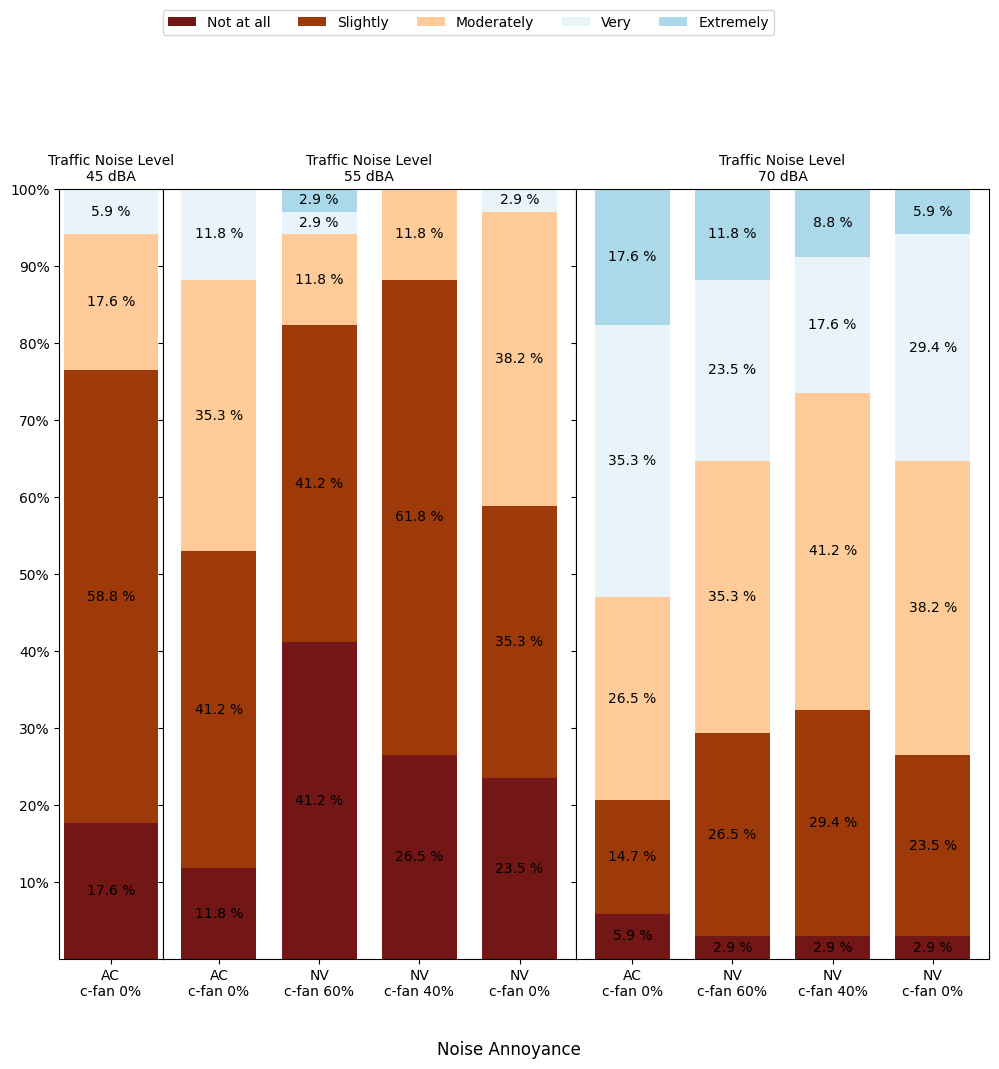

In [38]:
col_x = ['NoiseAnnoyance']
col_x_labels = ['Noise Annoyance']
group = ['Thermal', 'Traffic noise levels']
data_fat = data[col_x+group].copy()

custom_dict = {'AC':1, 'NV fan 5':2, 'NV fan 3':3,'NV fan 0':4,} 
data_fat.sort_values(by=['Thermal'], key=lambda x: x.map(custom_dict), inplace=True)
data_fat.reset_index(inplace=True)
colors = [("#3182bd"), ("#abd9e9"), ("#e8f4f9"), ("#ffcc99"), ("#9e3a09"), ("#721616")]
colors.reverse()
y_value = [1,2,3,4,5]
labels = ["Not at all", "Slightly", "Moderately", "Very", "Extremely"]

for index,item in enumerate(col_x):
    create_plot(data_fat, y_value, item, colors, labels, col_x_labels[index])